In [1]:
# Import Necessary Libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300

In [2]:
# Import Dataset

oil = pd.read_csv('Oil.csv')
print(oil)
oil.isna().sum()

            Date  Close    Volume   Open   High    Low
0     10/28/2022  87.90  241417.0  88.67  88.76  87.08
1     10/27/2022  88.26  273717.0  88.26  89.79  87.33
2     10/26/2022  87.91  271474.0  85.07  88.41  84.14
3     10/25/2022  85.32  226337.0  84.88  86.03  83.06
4     10/24/2022  84.58  238458.0  85.24  85.92  82.63
...          ...    ...       ...    ...    ...    ...
2543  11-05-2012  85.65  185846.0  84.65  85.90  84.34
2544  11-02-2012  84.86  273619.0  86.91  87.24  84.66
2545  11-01-2012  87.09  185097.0  86.10  87.42  85.92
2546  10/31/2012  86.24  192354.0  85.73  87.19  85.61
2547  10/30/2012  85.68       NaN  85.68  85.68  85.68

[2548 rows x 6 columns]


Date       0
Close      0
Volume    31
Open       0
High       0
Low        0
dtype: int64

In [3]:
df = oil.copy()
print(df)
df.isna().sum()

            Date  Close    Volume   Open   High    Low
0     10/28/2022  87.90  241417.0  88.67  88.76  87.08
1     10/27/2022  88.26  273717.0  88.26  89.79  87.33
2     10/26/2022  87.91  271474.0  85.07  88.41  84.14
3     10/25/2022  85.32  226337.0  84.88  86.03  83.06
4     10/24/2022  84.58  238458.0  85.24  85.92  82.63
...          ...    ...       ...    ...    ...    ...
2543  11-05-2012  85.65  185846.0  84.65  85.90  84.34
2544  11-02-2012  84.86  273619.0  86.91  87.24  84.66
2545  11-01-2012  87.09  185097.0  86.10  87.42  85.92
2546  10/31/2012  86.24  192354.0  85.73  87.19  85.61
2547  10/30/2012  85.68       NaN  85.68  85.68  85.68

[2548 rows x 6 columns]


Date       0
Close      0
Volume    31
Open       0
High       0
Low        0
dtype: int64

In [4]:
def fillna(data):
    data['Volume'].fillna(data['Volume'].median(), inplace=True)

fillna(oil)
fillna(df)

In [5]:
oil.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2548 non-null   object 
 1   Close   2548 non-null   float64
 2   Volume  2548 non-null   float64
 3   Open    2548 non-null   float64
 4   High    2548 non-null   float64
 5   Low     2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2548 non-null   object 
 1   Close   2548 non-null   float64
 2   Volume  2548 non-null   float64
 3   Open    2548 non-null   float64
 4   High    2548 non-null   float64
 5   Low     2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


(None, None)

In [6]:
# Convert the 'Date' column to a datetime format
oil['Date'] = pd.to_datetime(oil['Date'])
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by date in ascending order
oil.sort_values('Date', inplace=True)
df.sort_values('Date', inplace=True)

# Extract the year from the 'Date' column
oil['Year'] = oil['Date'].dt.year
df['Year'] = df['Date'].dt.year

# Set Date column as index column
oil.set_index('Date', inplace=True)

# EDA

### Summary Statistics

In [7]:
oil.describe()

,Close,Volume,Open,High,Low,Year
count,2548.000000,2.548000e+03,2548.000000,2548.000000,2548.000000,2548.000000
mean,66.043740,3.950866e+05,66.042500,66.959839,65.065043,2017.289246
std,22.732093,2.331327e+05,22.710749,22.820487,22.565127,2.905515
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000,2012.000000
25%,48.620000,2.255235e+05,48.665000,49.317500,47.800000,2015.000000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000,2017.000000
75%,87.467500,5.558335e+05,87.450000,88.695000,86.342500,2020.000000
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000,2022.000000


In [8]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2012-10-30 to 2022-10-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2548 non-null   float64
 1   Volume  2548 non-null   float64
 2   Open    2548 non-null   float64
 3   High    2548 non-null   float64
 4   Low     2548 non-null   float64
 5   Year    2548 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.3 KB


### Time Series Plot of Oil Price
- This plot helps visualize how oil prices have changed over time.
- Also helps to determine  the 'Stationarity' of the data.

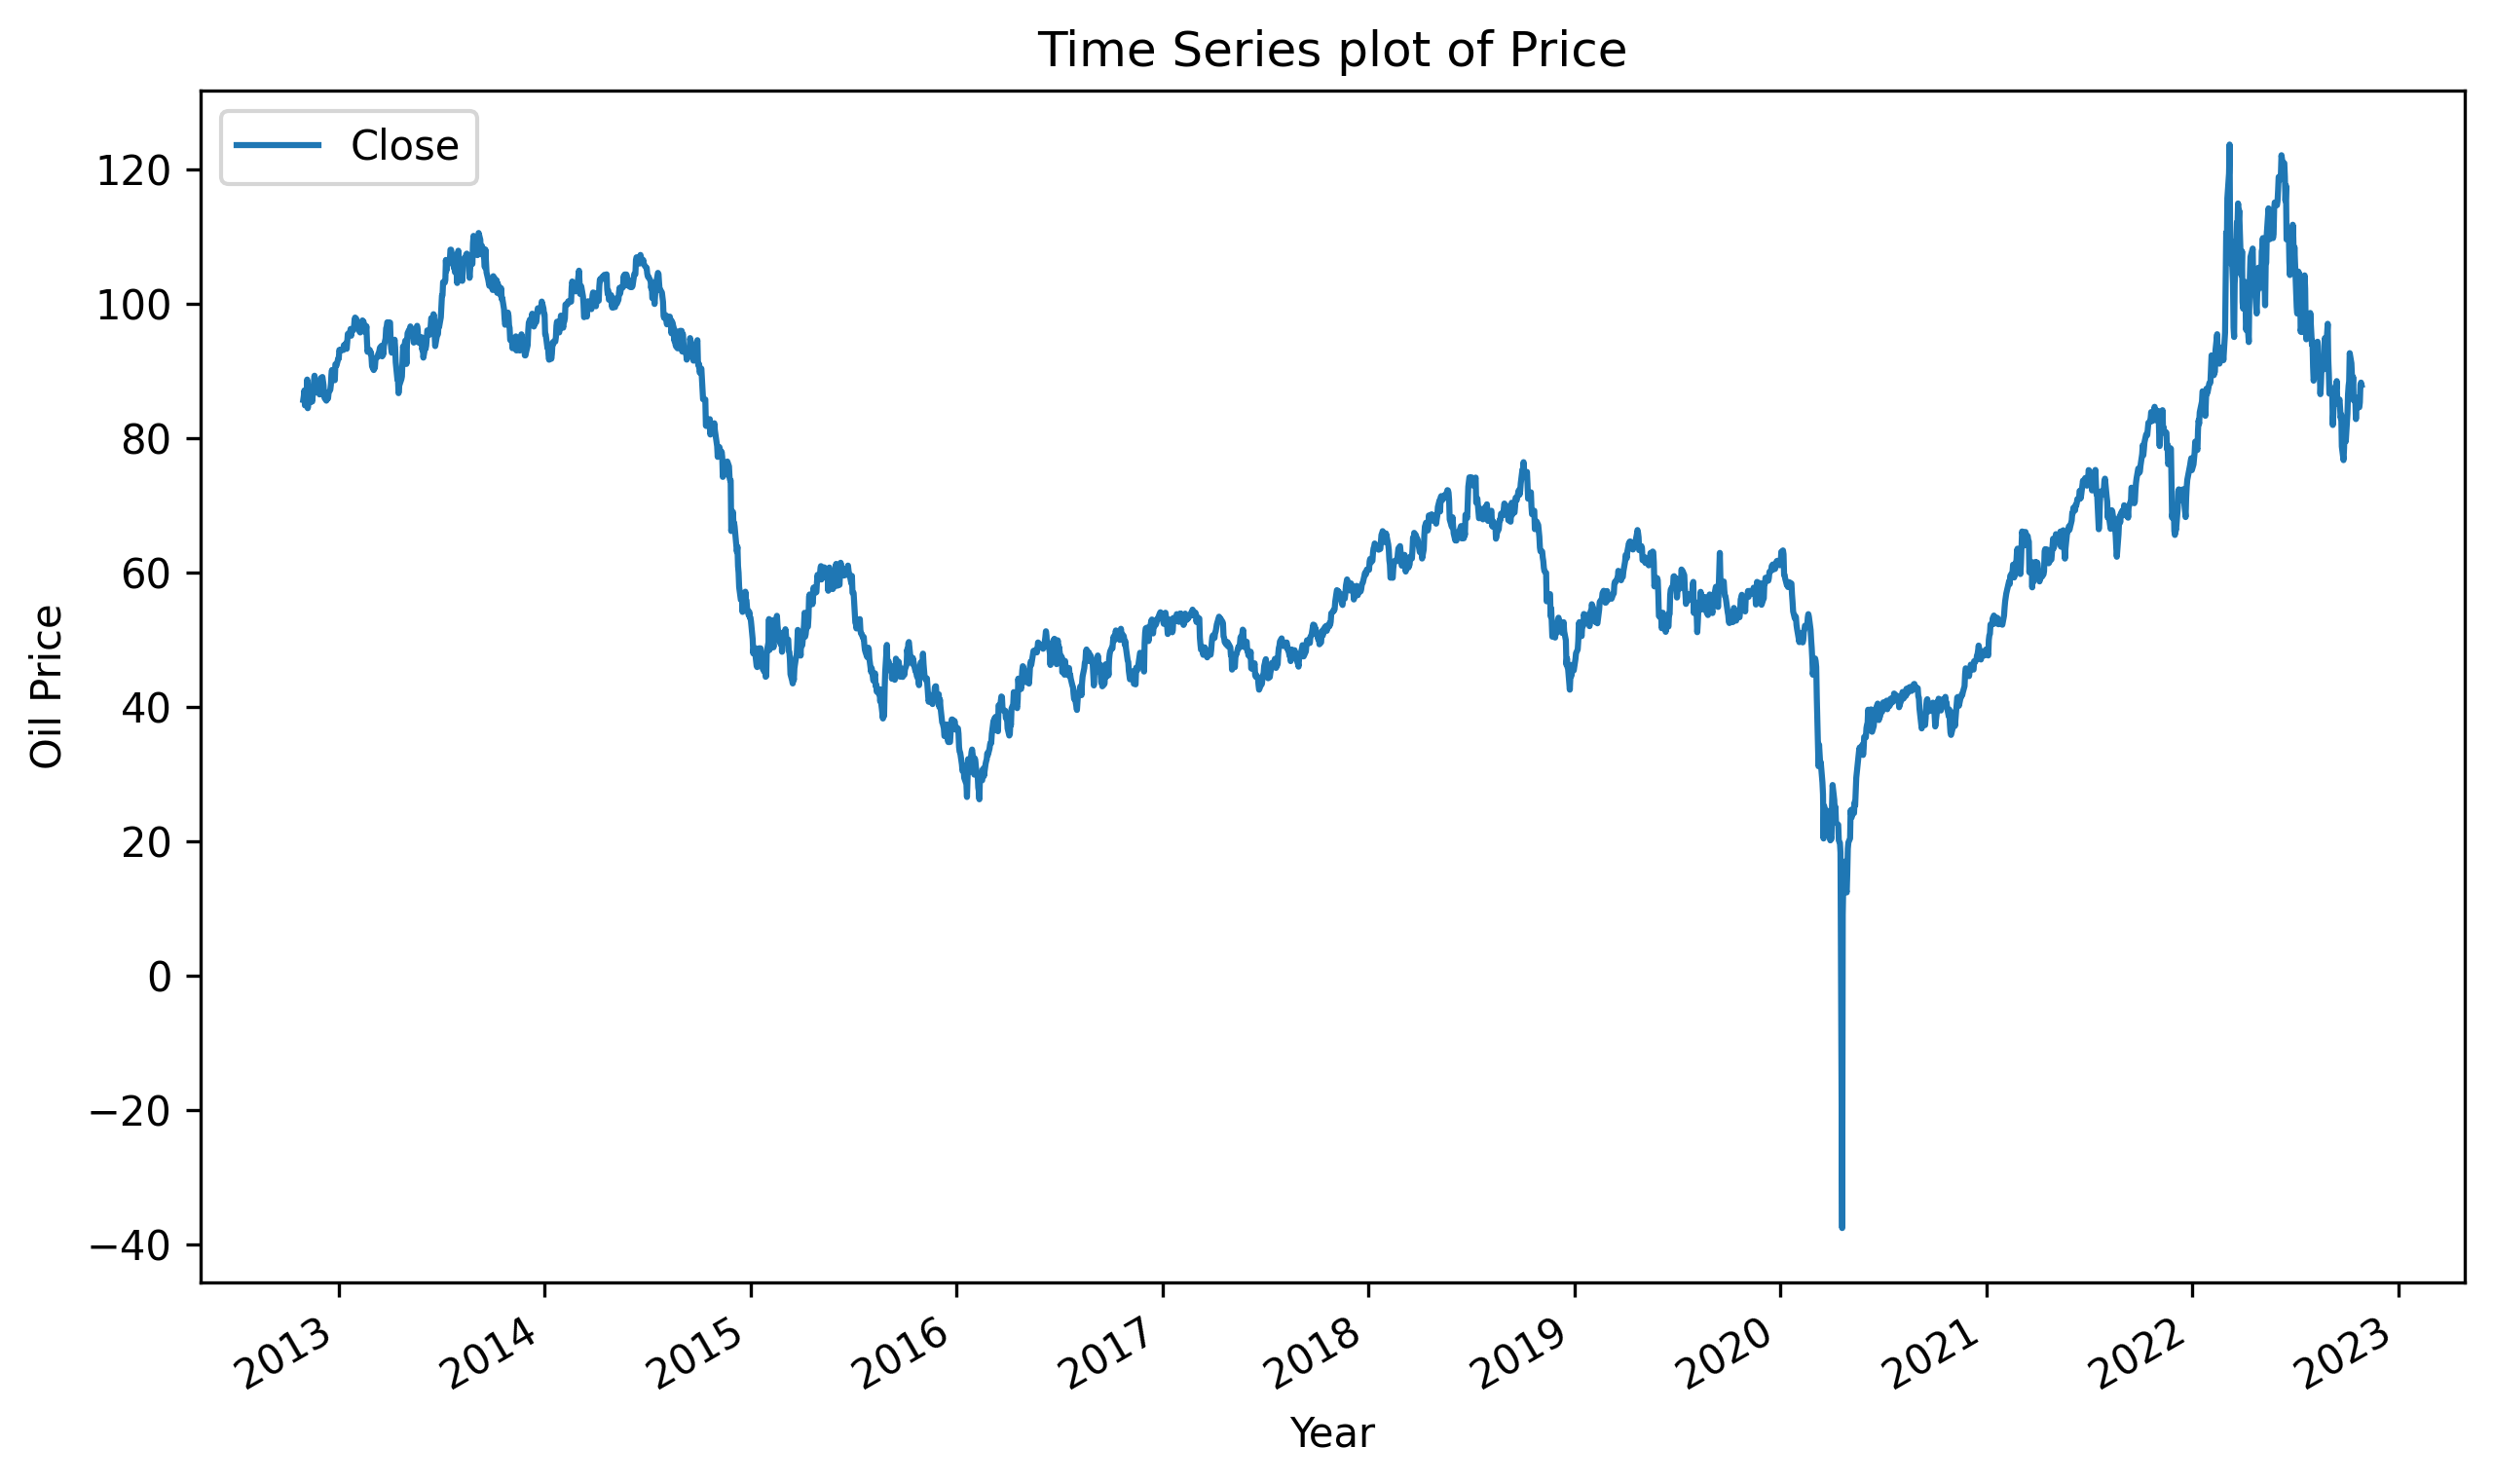

In [9]:
oil.Close.plot()
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Time Series plot of Price')
plt.legend()

Text(0.5, 1.0, 'Mean of Oil Price per Year')

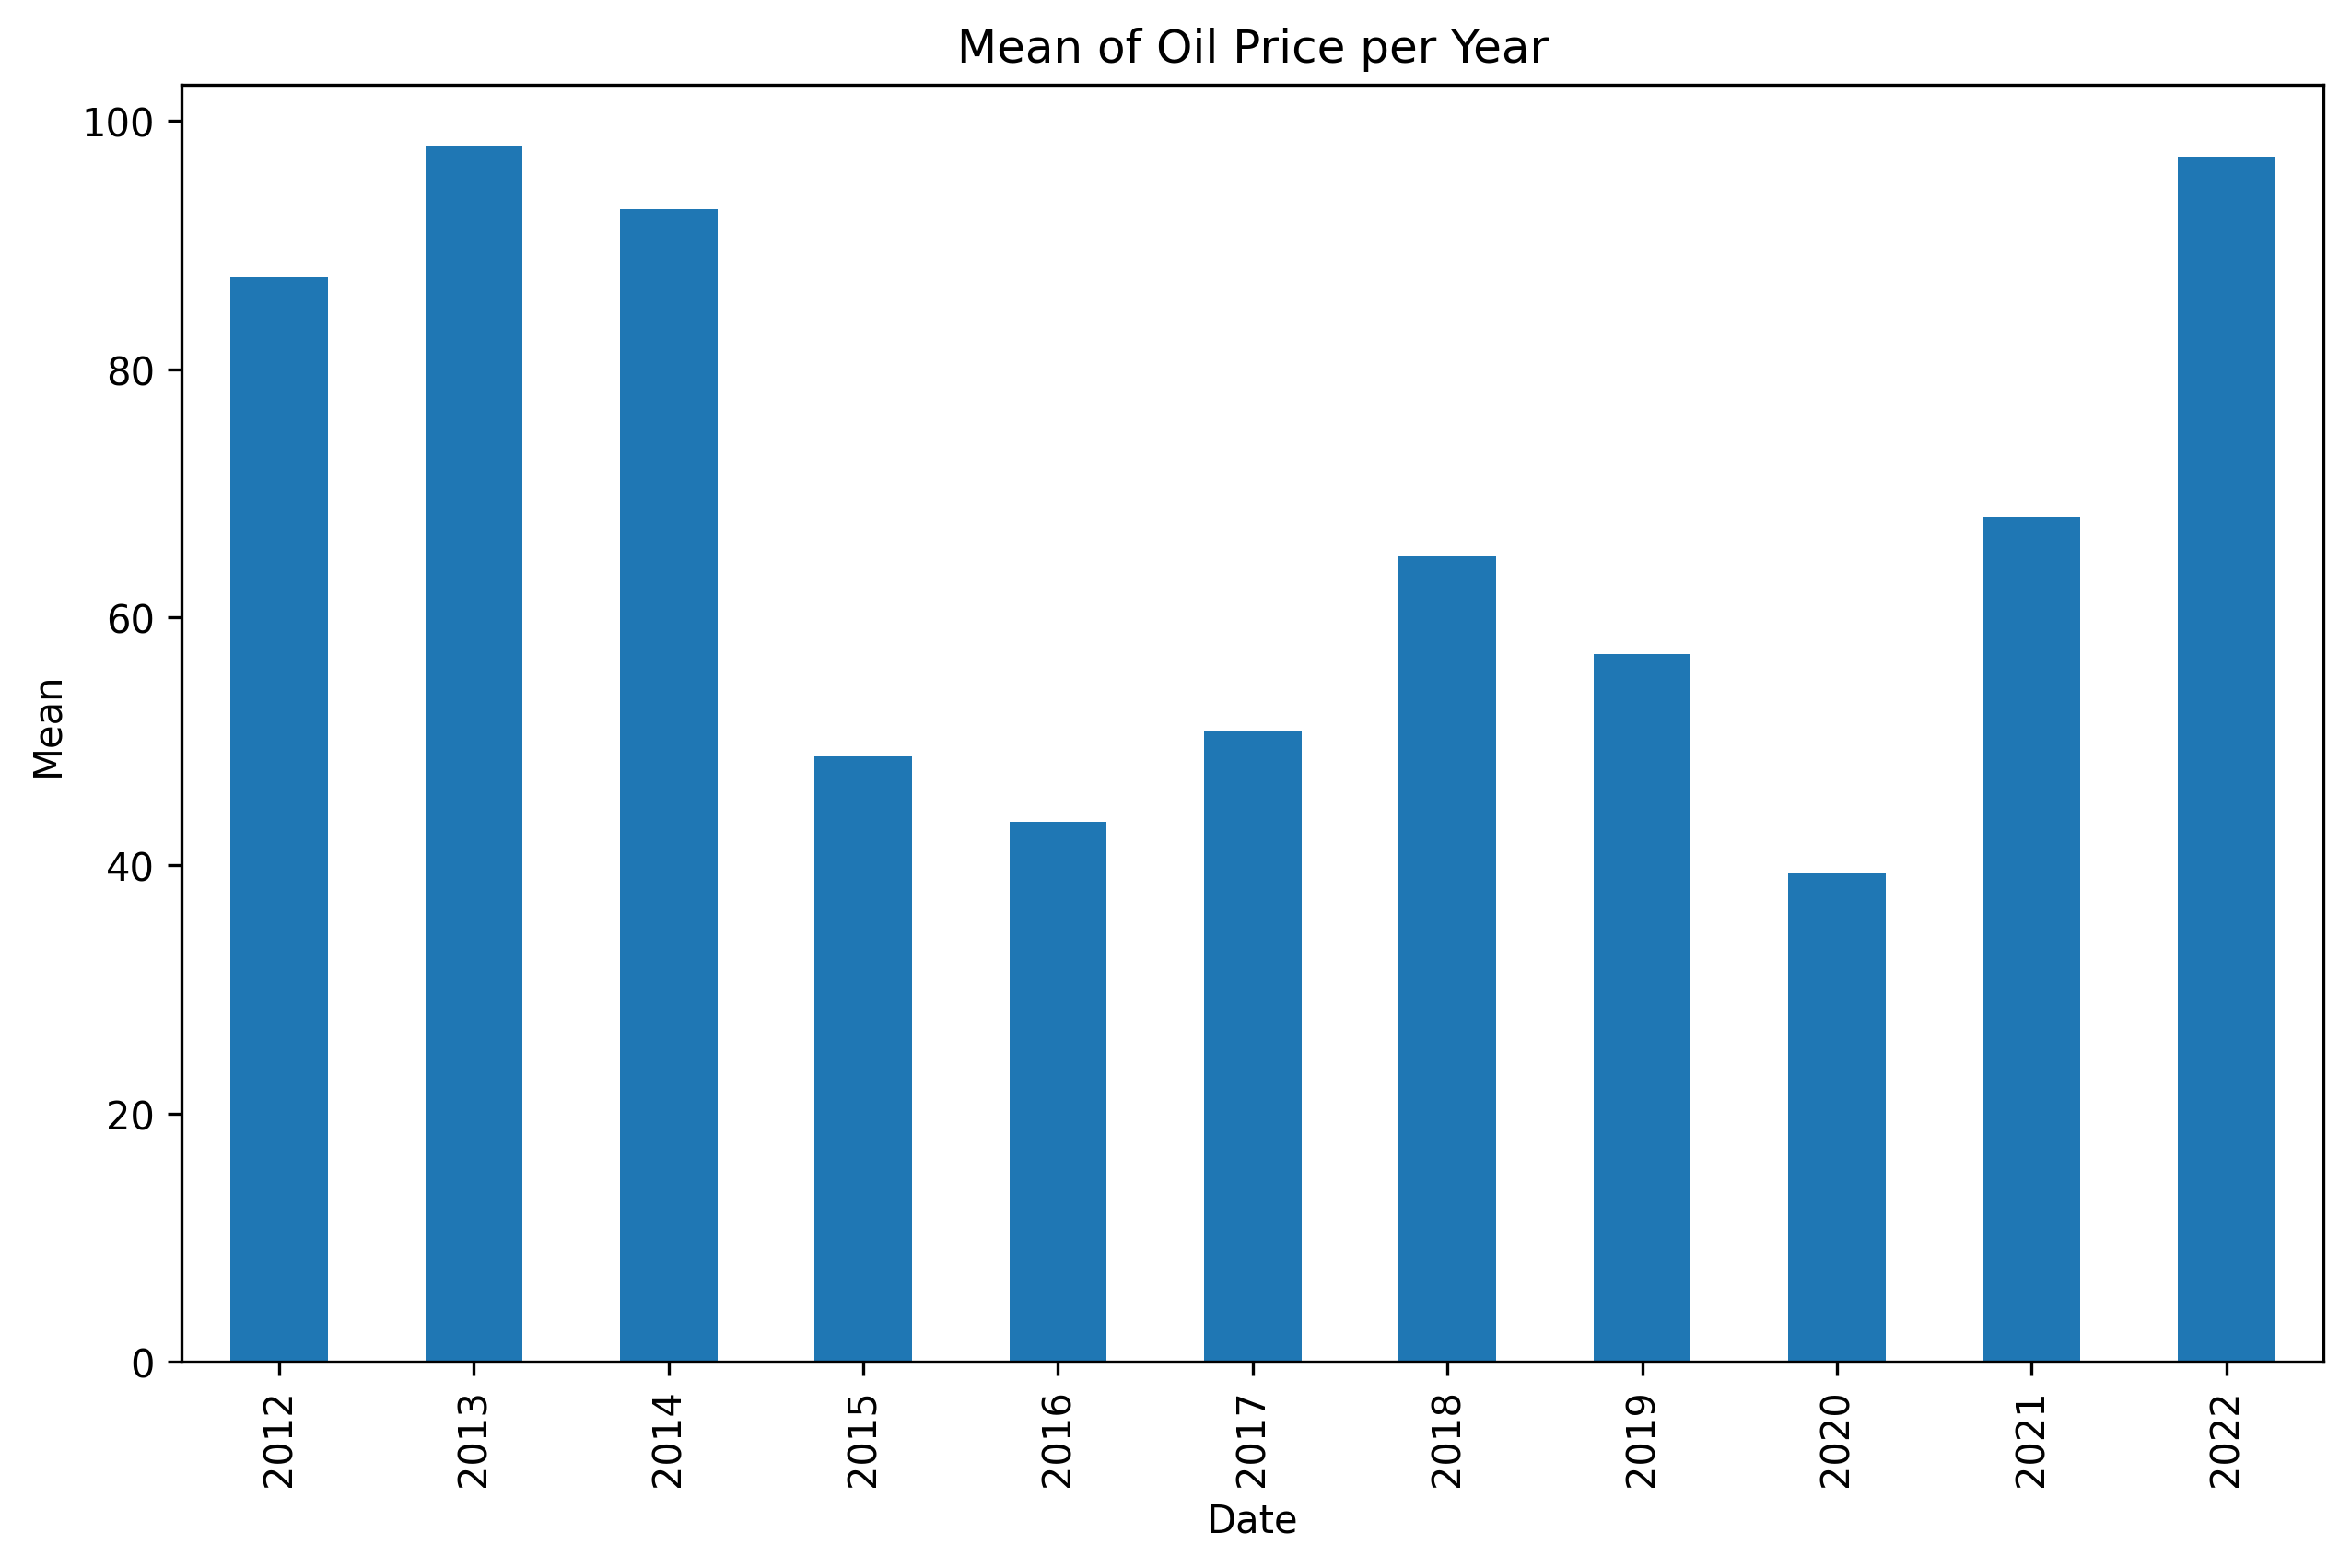

In [10]:
oil.groupby(oil.index.year)['Close'].mean().plot(kind='bar')
plt.ylabel('Mean')
plt.title('Mean of Oil Price per Year')

In [11]:
variance = oil['Close'].var()
variance

516.748047921479

### Autocorrelation Plot (Pandas)
- To check randomness in a data set. This randomness is ascertained by computing autocorrelation for data values at varying time lags.
- Helps to visually identify whether there are significant autocorrelations at specific lags. Peaks or clusters of points outside the confidence interval may indicate potential lags to consider when building time series models.

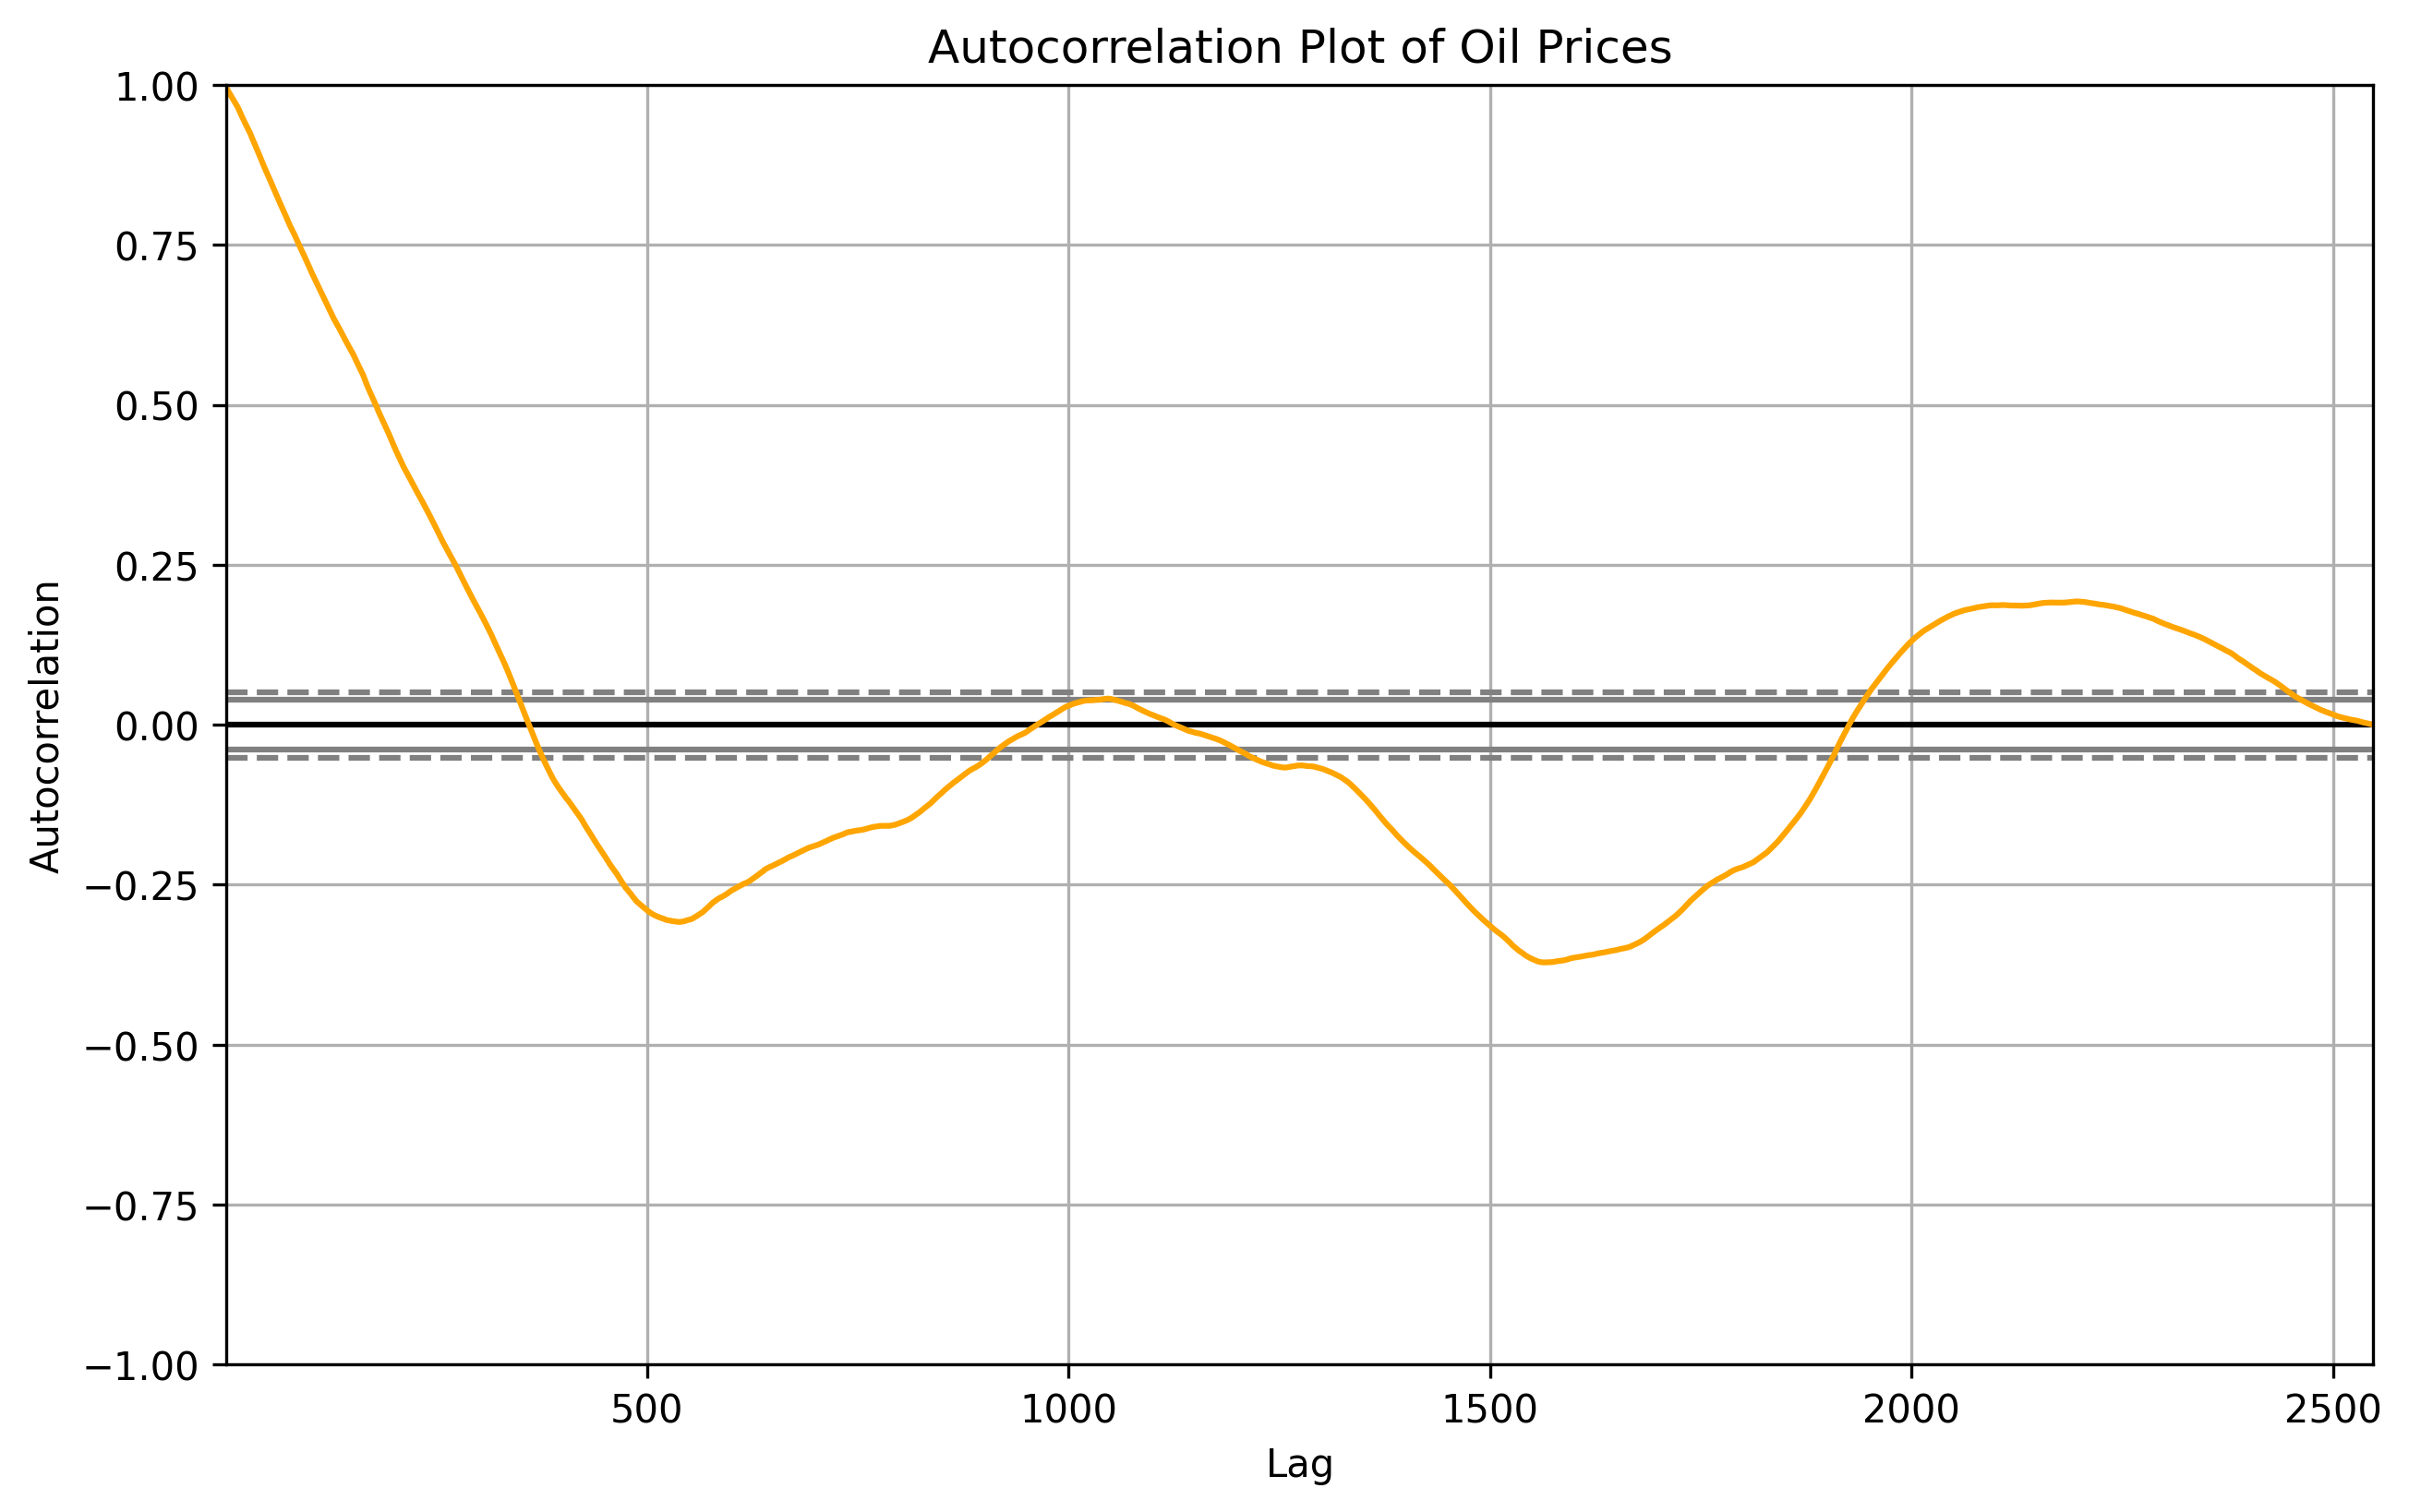

In [12]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(oil['Close'], color='orange')
plt.title('Autocorrelation Plot of Oil Prices')
plt.show()

### Rolling Mean and Standard Deviation
- Rolling mean and standard deviation help in identifying trends and seasonality in the data.
- They provide a smoothed view of the time series, making it easier to identify patterns.
- Rolling mean smoothens short-term fluctuations, making long-term trends more apparent.
- Changes in rolling standard deviation can indicate periods of varying volatility.

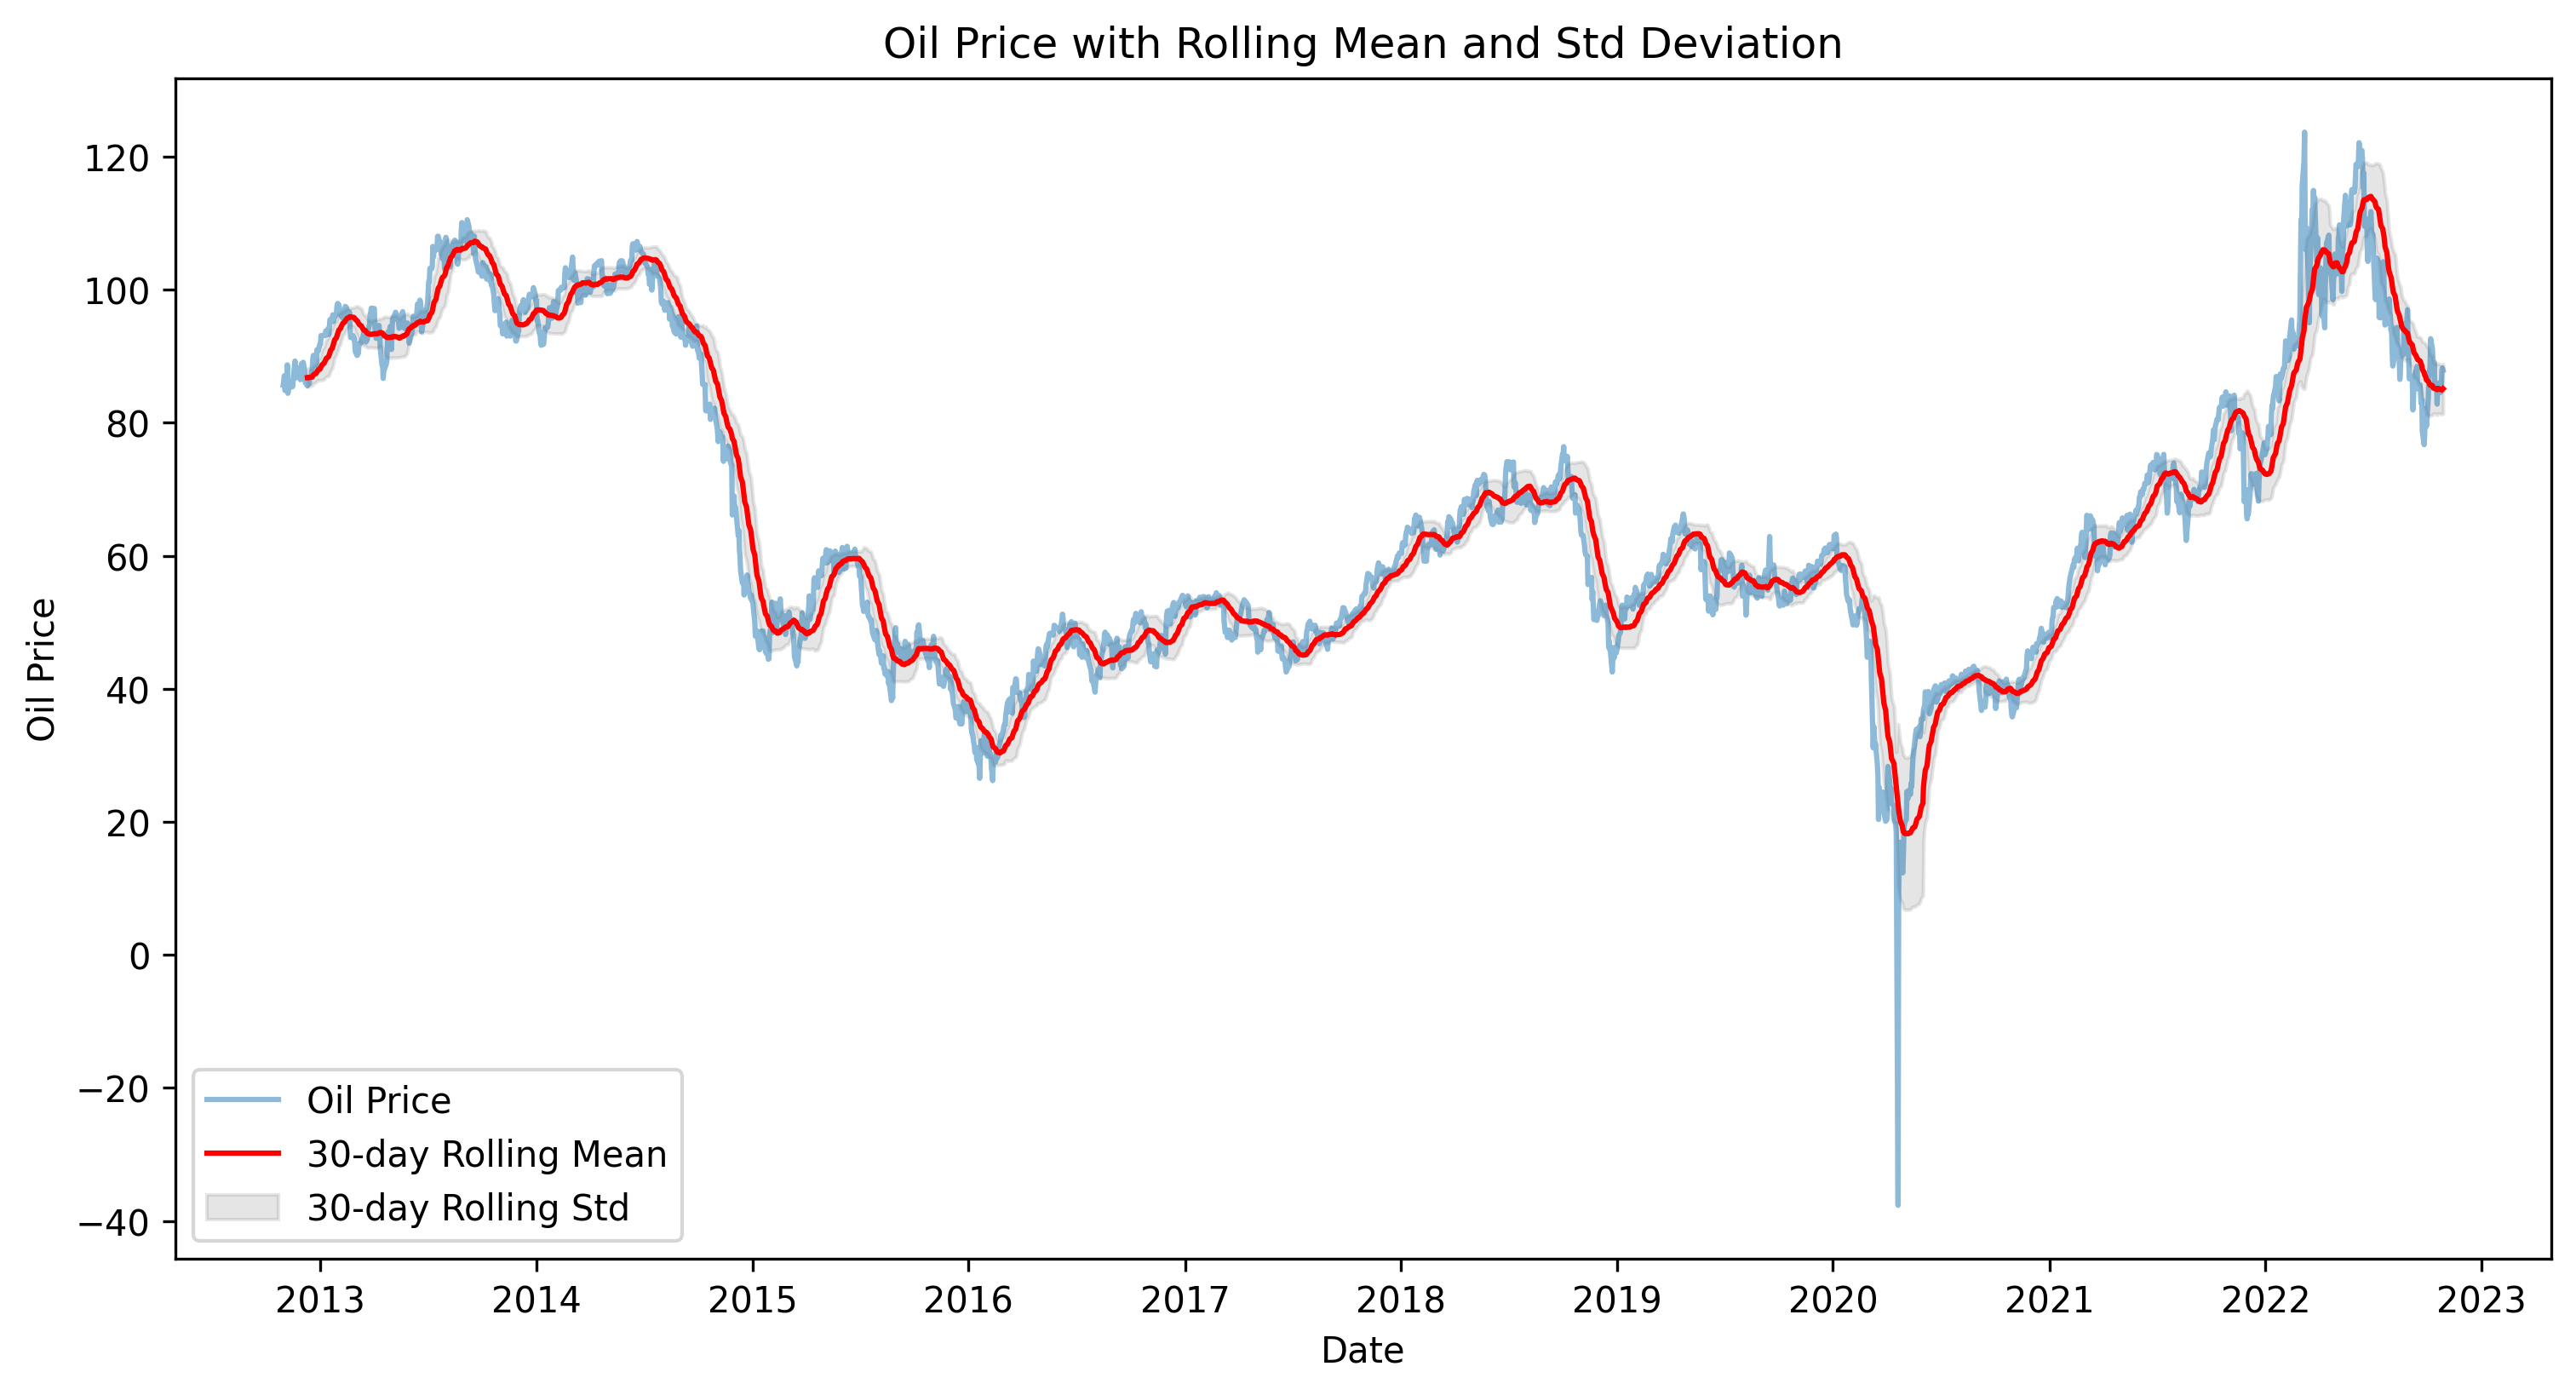

In [13]:
rolling_window = 30
df['Rolling_Mean'] = df['Close'].rolling(window=rolling_window).mean()
df['Rolling_Std'] = df['Close'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Oil Price', alpha=0.5)
plt.plot(df['Date'], df['Rolling_Mean'], label='30-day Rolling Mean', color='red')
plt.fill_between(df['Date'], df['Rolling_Mean'] - df['Rolling_Std'], df['Rolling_Mean'] + df['Rolling_Std'], color='gray', alpha=0.2, label='30-day Rolling Std')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price with Rolling Mean and Std Deviation')
plt.legend()

### First-Order Differencing
- Differencing is a technique used to gain Staionarity in Non-Stationary data.

In [14]:
oil1 = oil.copy()
oil1['First-Order'] = oil1['Close'].diff(periods=1)
oil1.dropna(inplace=True)
oil1

,Close,Volume,Open,High,Low,Year,First-Order
Date,,,,,,,
2012-10-31,86.24,192354.0,85.73,87.19,85.61,2012,0.56
2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012,0.85
2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012,-2.23
2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012,0.79
2012-11-06,88.71,270163.0,85.67,89.22,85.42,2012,3.06
...,...,...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022,-0.56
2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022,0.74
2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022,2.59


### ADFuller Test
- Augmented Dickey Fuller test ( ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. 
- It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADFuller Test (Before & After Differencing)
def adf_test(data):
    adf = adfuller(data, autolag = 'AIC')
    print("P-Value : ", adf[1])

In [16]:
print('ADFuller Test Before Differencing')
print(adf_test(oil1['Close']))
print('ADFuller Test After Differencing')
print(adf_test(oil1['First-Order']))

ADFuller Test Before Differencing
P-Value :  0.3702910296286567
None
ADFuller Test After Differencing
P-Value :  1.1704620261390229e-20
None


### ACF & PACF
- The ACF plot shows the correlation of a time series with itself at different lags.
- The PACF plot shows the correlation of a time series with itself at different lags, after removing the effects of the previous lags.
- The ACF and PACF plots can be used to identify the order of AR, MA, and ARMA models.

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Claculate ACF

acf_values = acf(oil1['First-Order'])
acf_values

array([ 1.00000000e+00, -2.22927241e-01, -2.91339420e-02, -1.89345974e-02,
        6.26856248e-03, -6.26125614e-03,  2.91406893e-04, -1.23664815e-02,
        1.23305061e-02,  1.02063497e-02, -2.73785033e-02, -2.25121354e-02,
        3.42216321e-02,  3.85105168e-02,  1.38276018e-03,  3.24190564e-02,
        1.89575236e-02,  2.54656571e-03, -2.77408716e-02, -9.97834838e-03,
        2.16313471e-02, -2.03927844e-02,  3.56543807e-02, -2.05006097e-02,
        4.00900803e-03, -1.35139810e-02, -2.12247915e-02,  1.18350102e-02,
       -3.88696850e-03,  1.00042440e-01, -2.96544795e-02, -2.00313218e-02,
        2.85788175e-02, -2.93941173e-02, -7.56289168e-03])

In [18]:
#Claculate PACF

pacf_values = pacf(oil1['First-Order'])
pacf_values

array([ 1.        , -0.2230148 , -0.08302157, -0.04716914, -0.01236887,
       -0.01143222, -0.00490065, -0.01526237,  0.00552322,  0.0135639 ,
       -0.02274752, -0.03468812,  0.01922342,  0.04973622,  0.02601903,
        0.04907607,  0.04534947,  0.0249525 , -0.01572154, -0.01640863,
        0.01489999, -0.01779743,  0.03154716, -0.00230361,  0.00257826,
       -0.01426155, -0.03102794, -0.00430654, -0.01538564,  0.09651935,
        0.01613653, -0.01242904,  0.02772473, -0.01854251, -0.01561121])

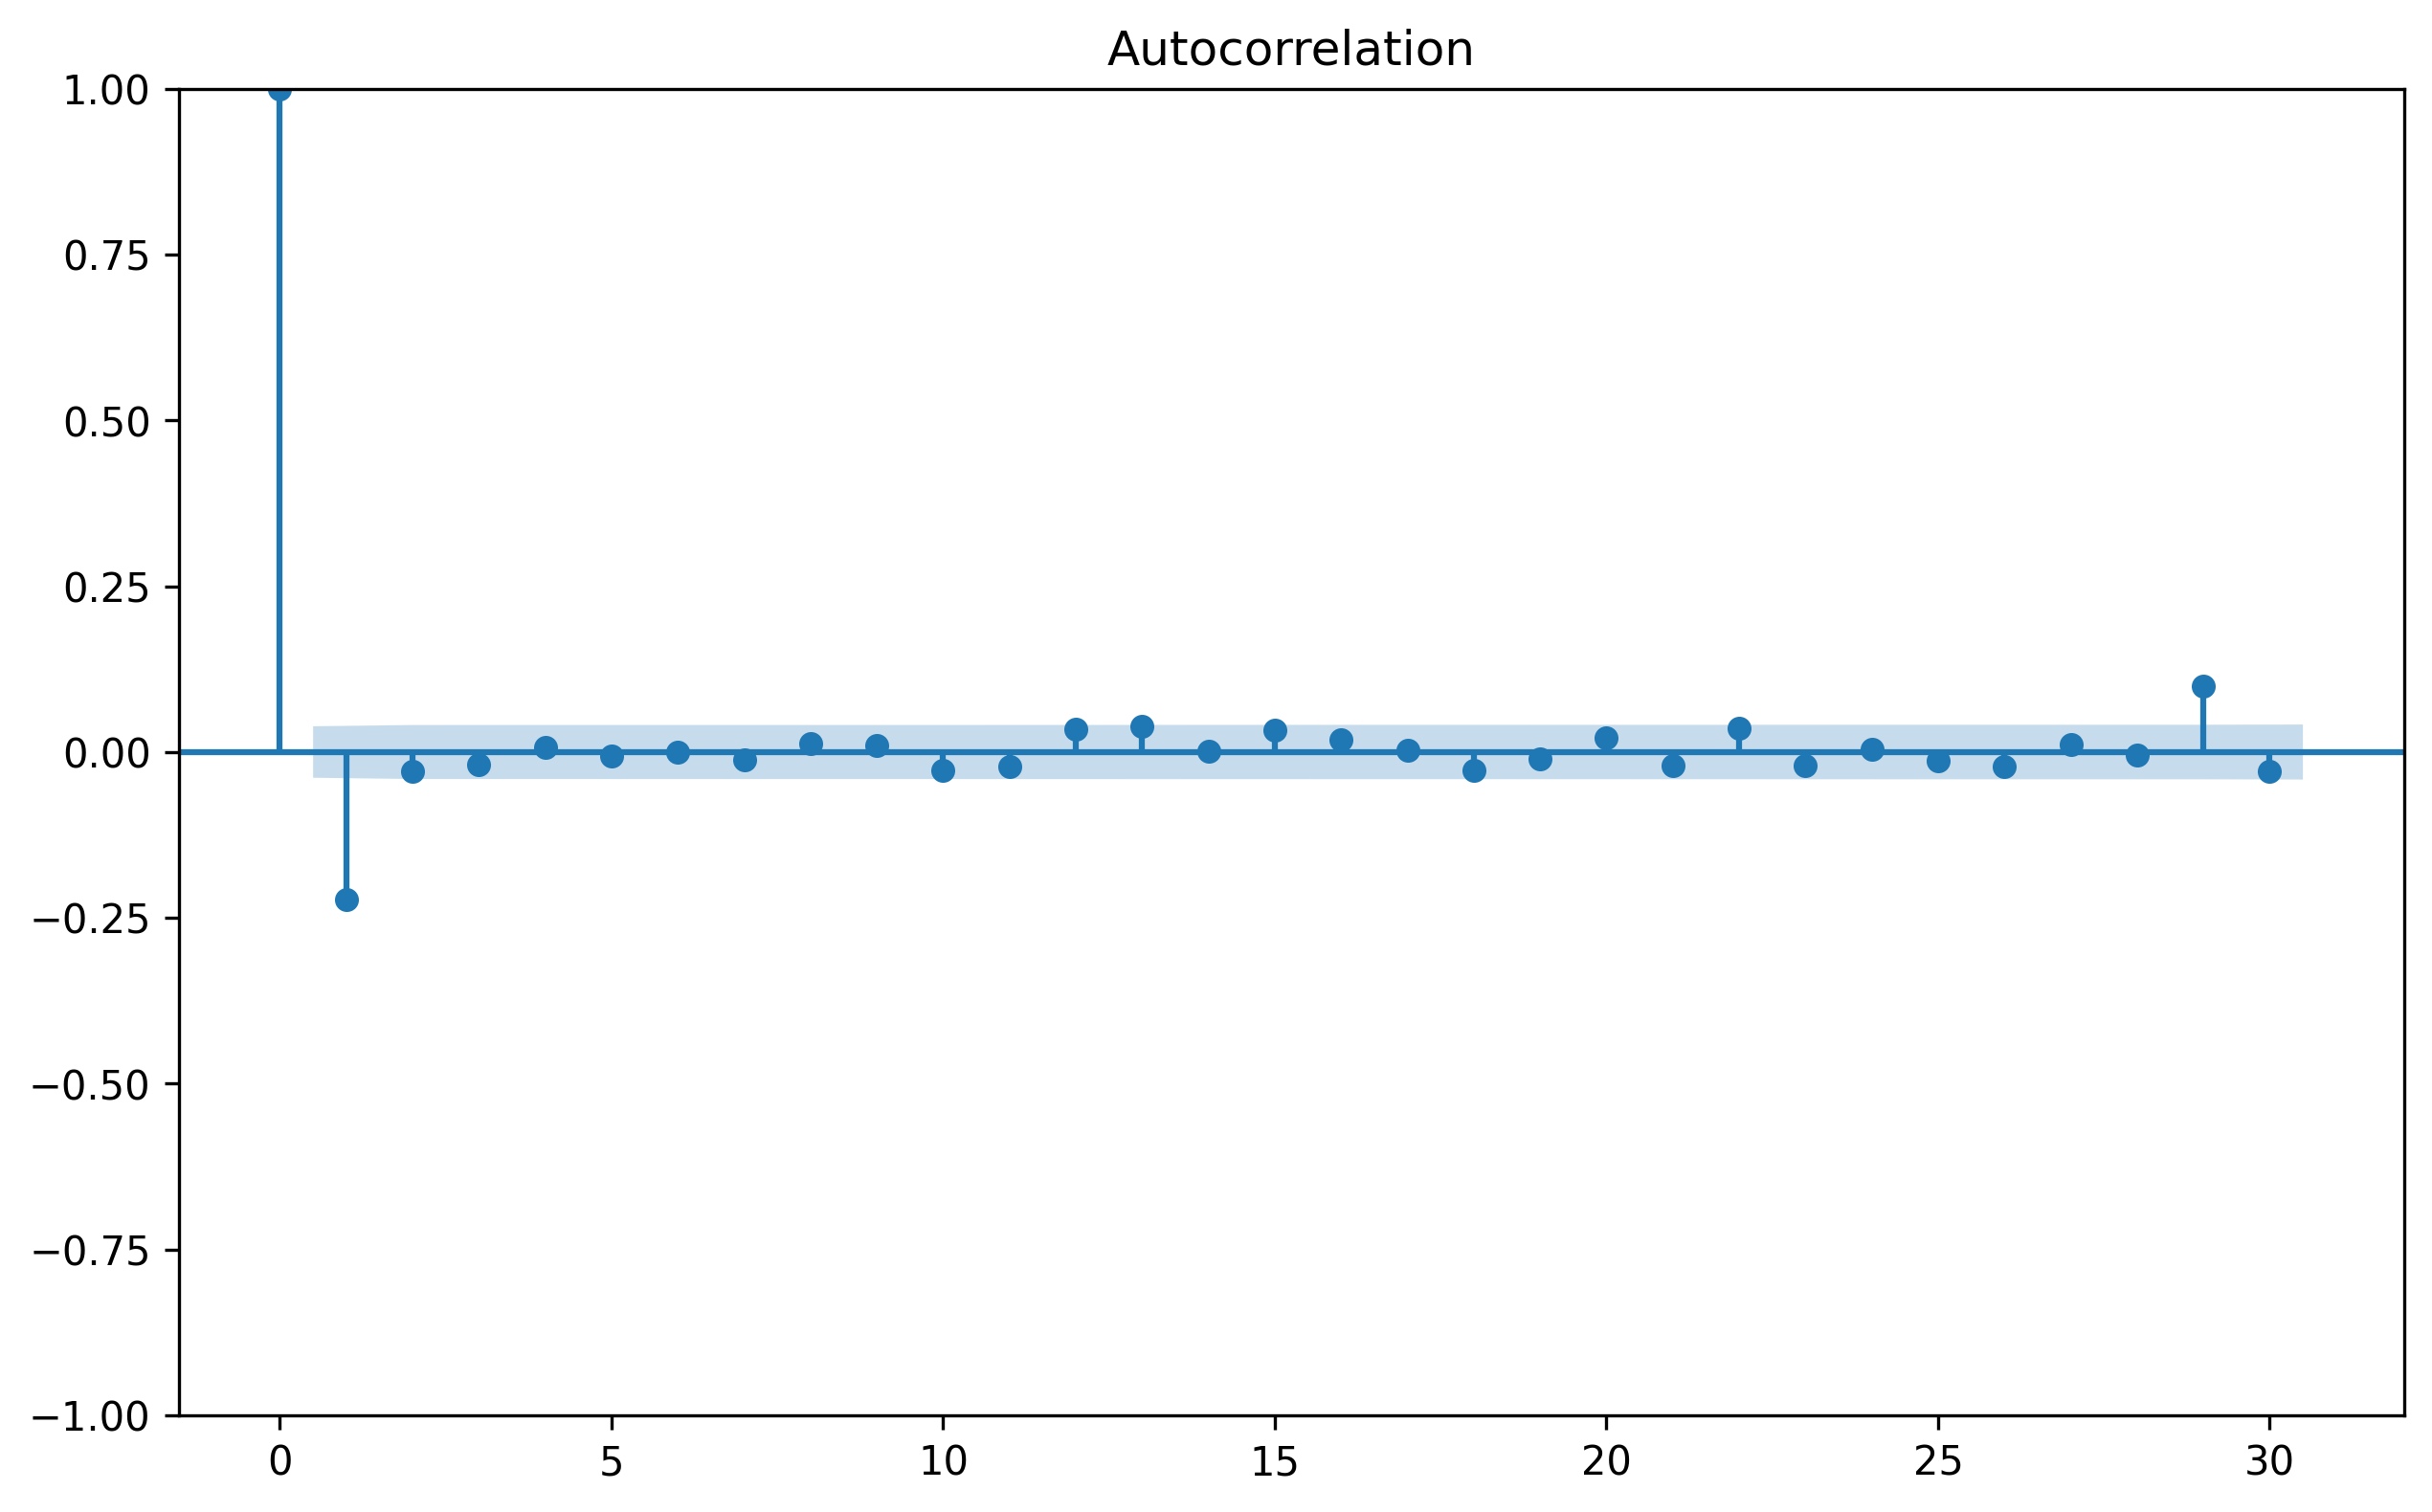

In [19]:
# ACF Plot

plot_acf(oil1['First-Order'], lags=30);

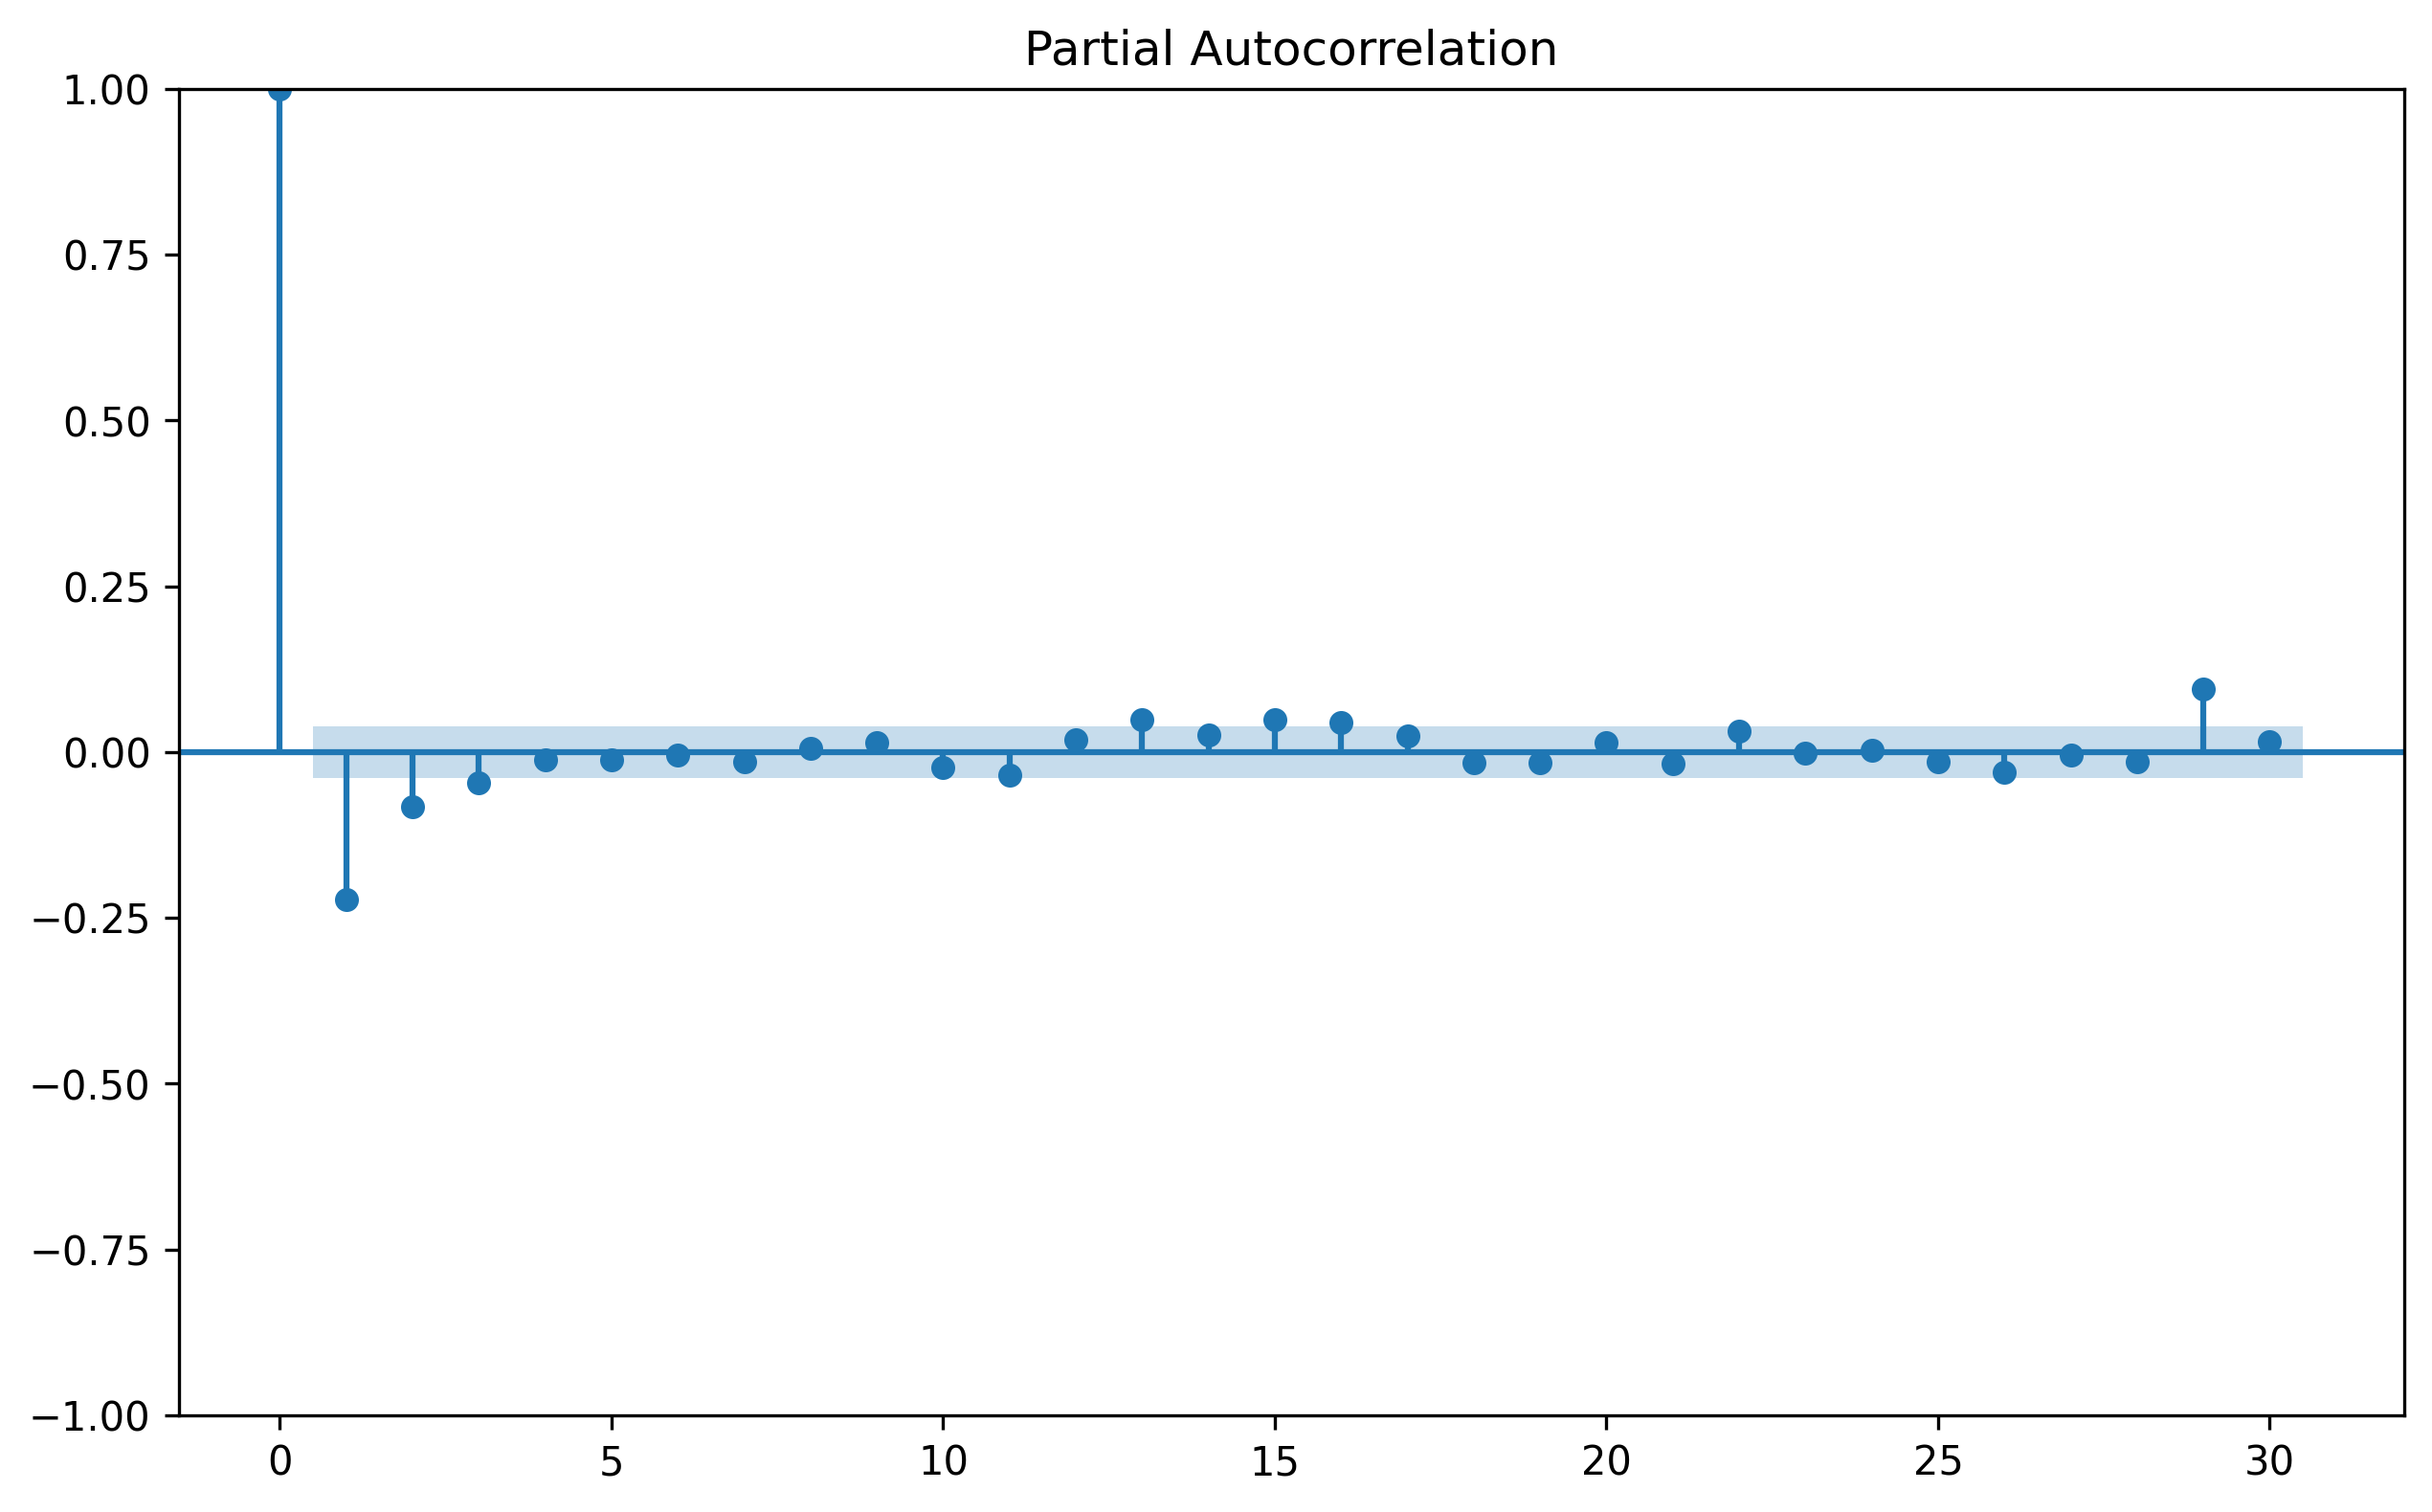

In [20]:
# PACF Plot

plot_pacf(oil1['First-Order'], lags=30);

### Pair Plot for Selected Columns
- This plot shows pairwise relationships between key columns.
- It provides insights into how different features are related. For example, it can help identify if volume and price are correlated.

Text(0.5, 1.0, 'Pair Plot for Selected Columns')

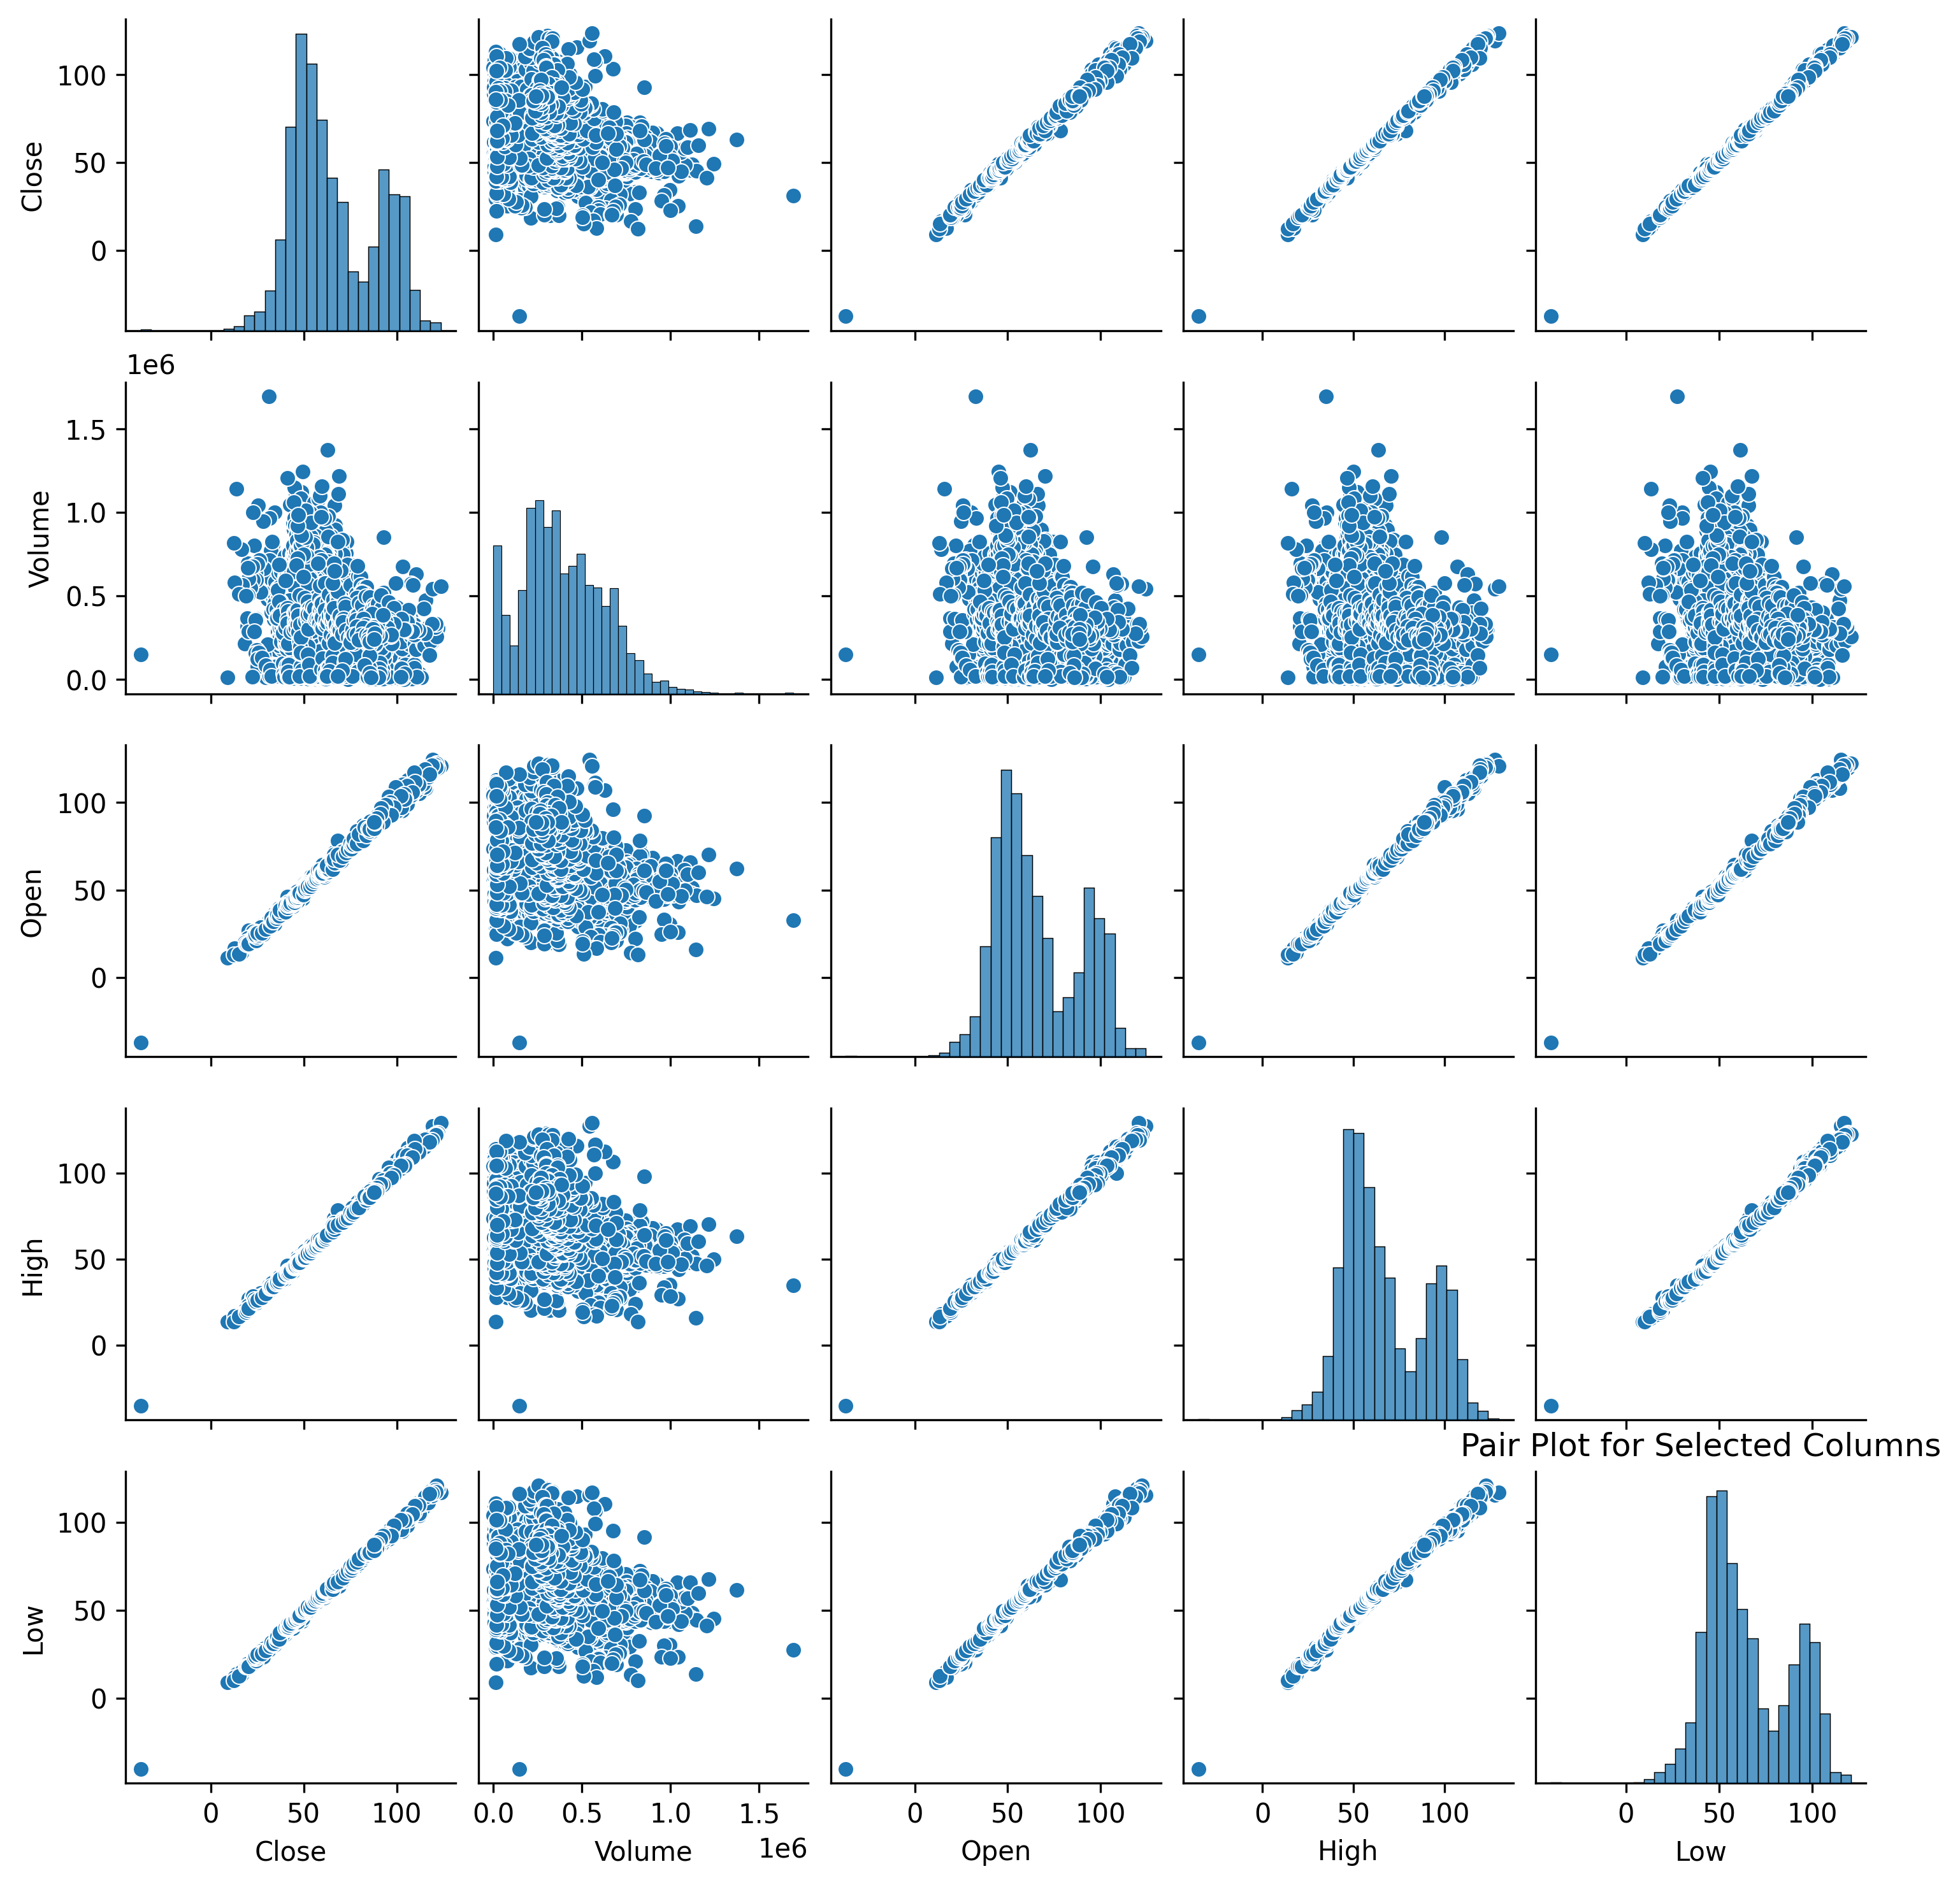

In [21]:
sns.pairplot(oil[['Close', 'Volume', 'Open', 'High', 'Low']], height=2)
plt.title('Pair Plot for Selected Columns')

In [22]:
oil.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2012-10-30 to 2022-10-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2548 non-null   float64
 1   Volume  2548 non-null   float64
 2   Open    2548 non-null   float64
 3   High    2548 non-null   float64
 4   Low     2548 non-null   float64
 5   Year    2548 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 2547 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2548 non-null   datetime64[ns]
 1   Close         2548 non-null   float64       
 2   Volume        2548 non-null   float64       
 3   Open          2548 non-null   float64       
 4   High          2548 non-null   float64       
 5   Low           2548 non-null   float64       
 6   Year          254

(None, None)

### Distplot
- To check the data distribution in each column.

Close


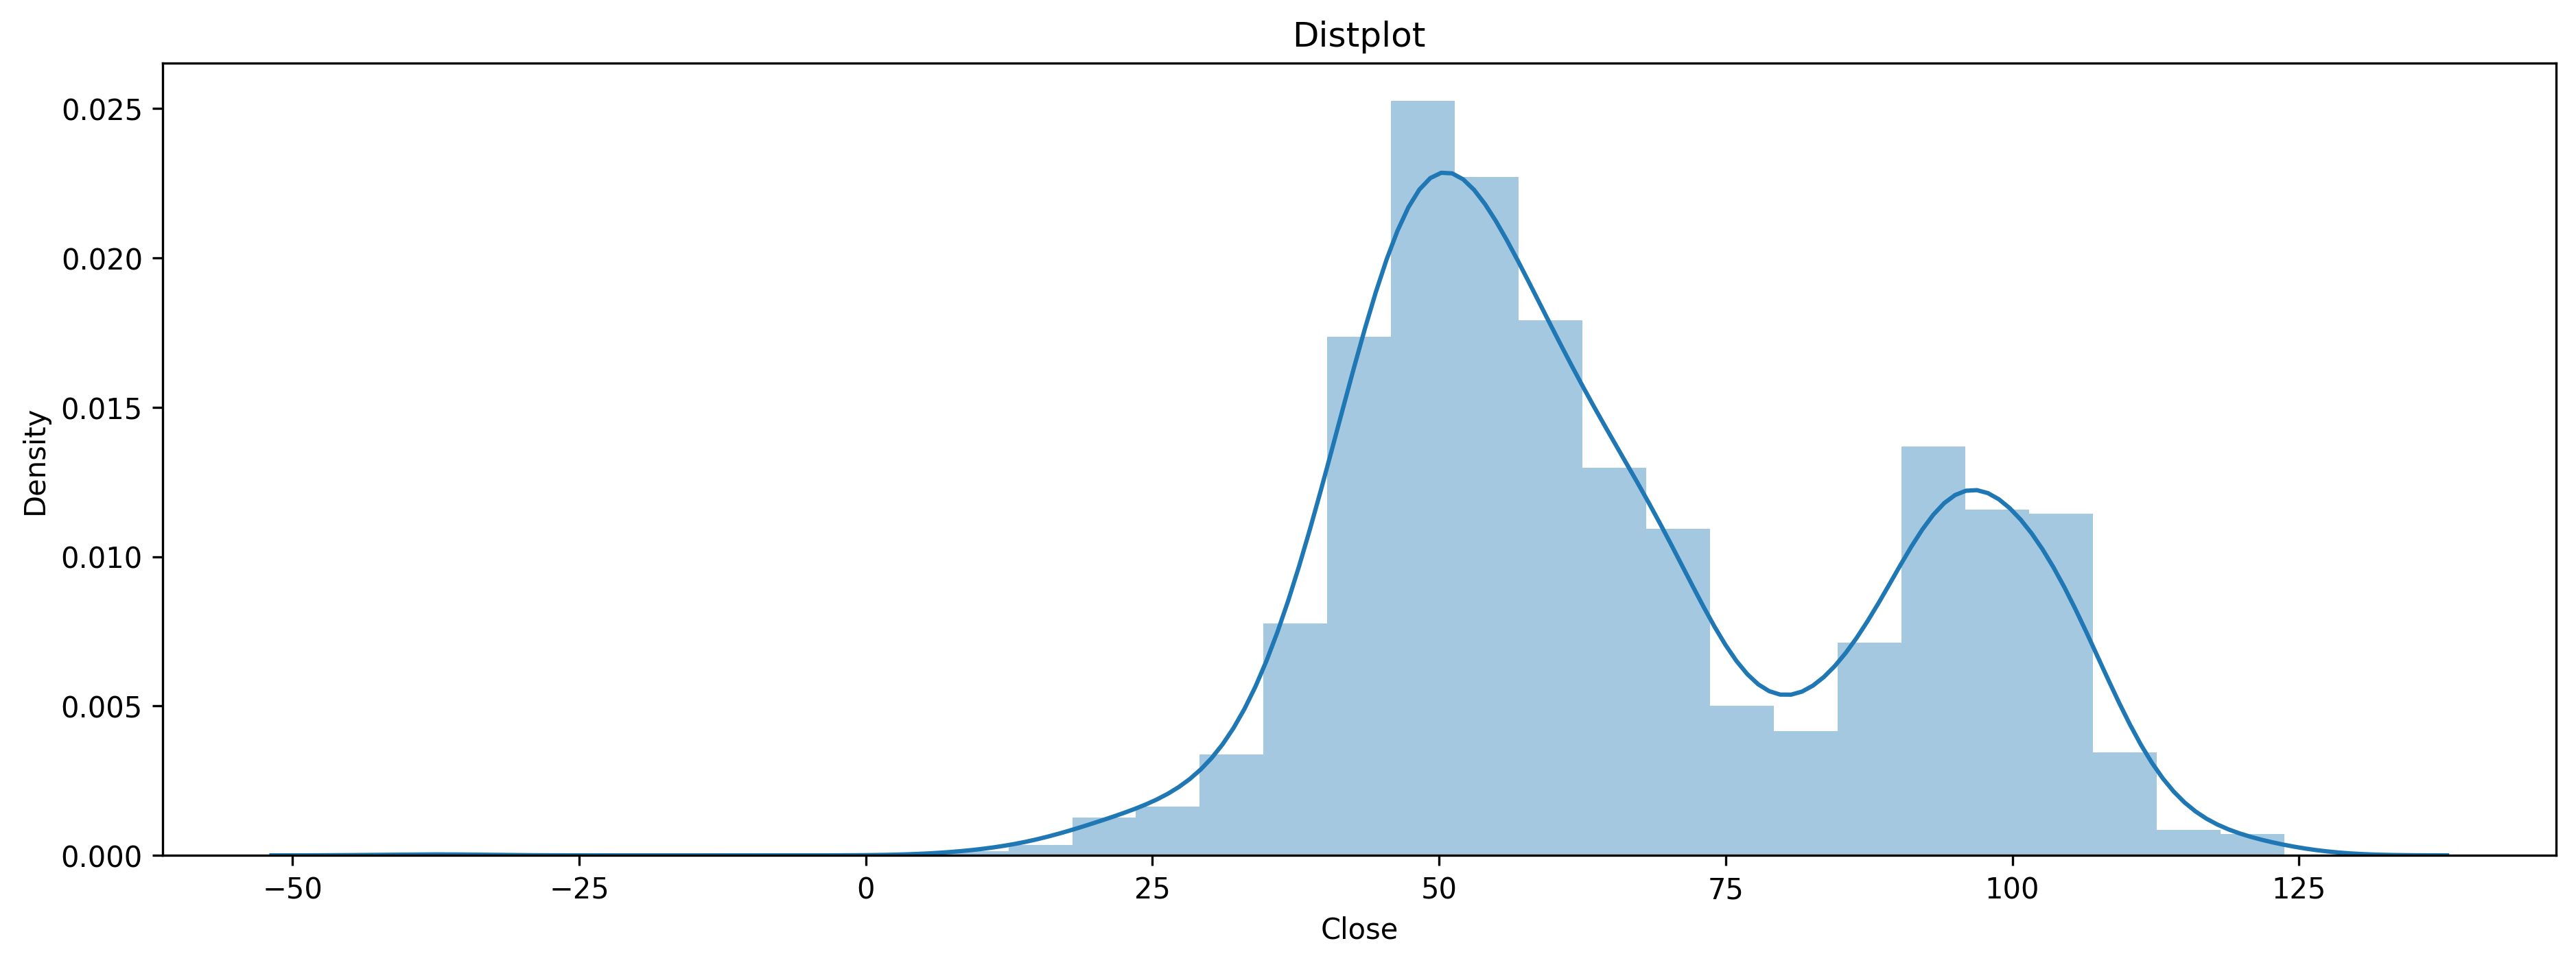

Volume


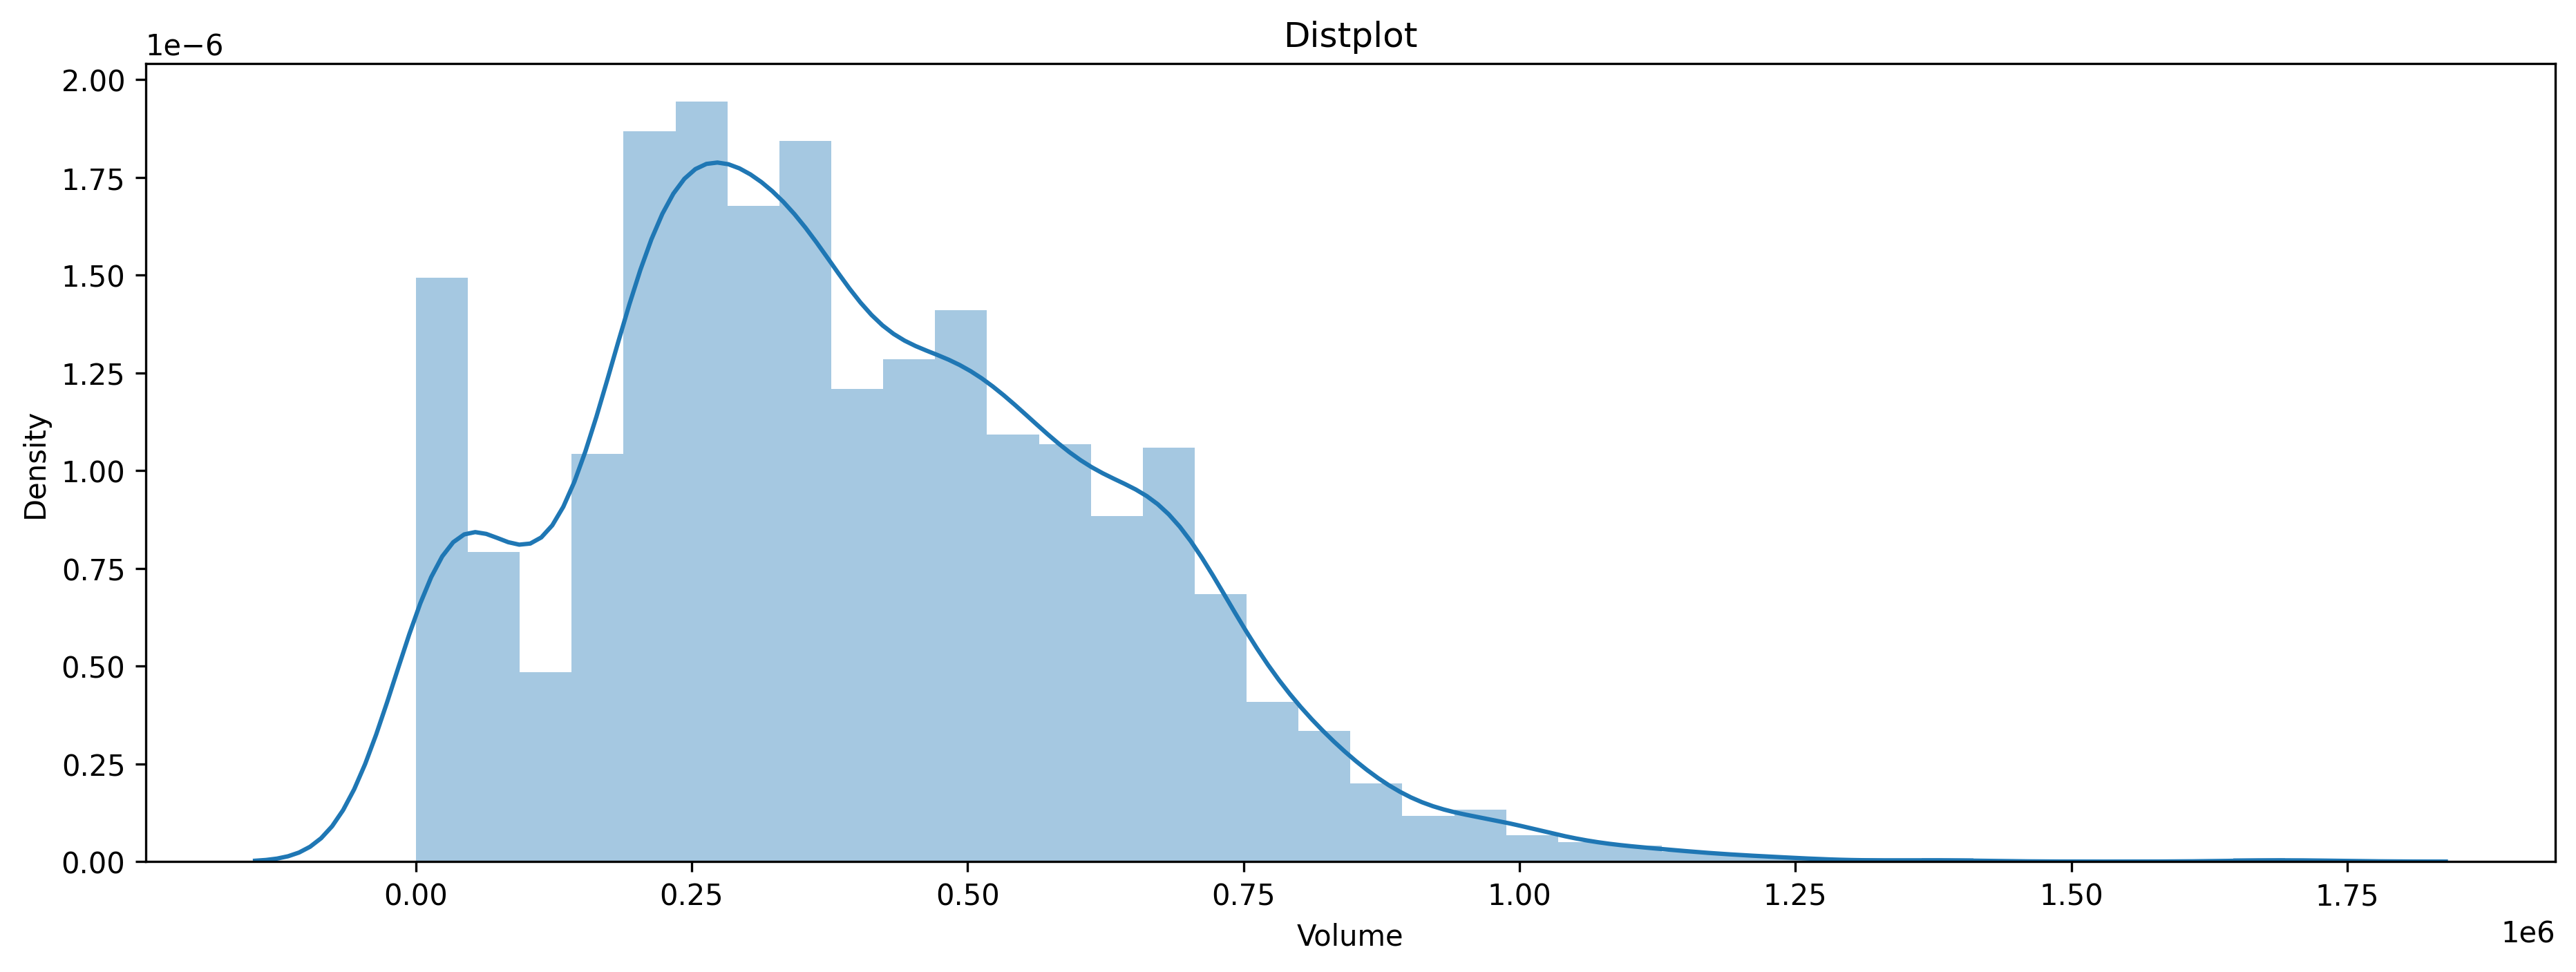

Open


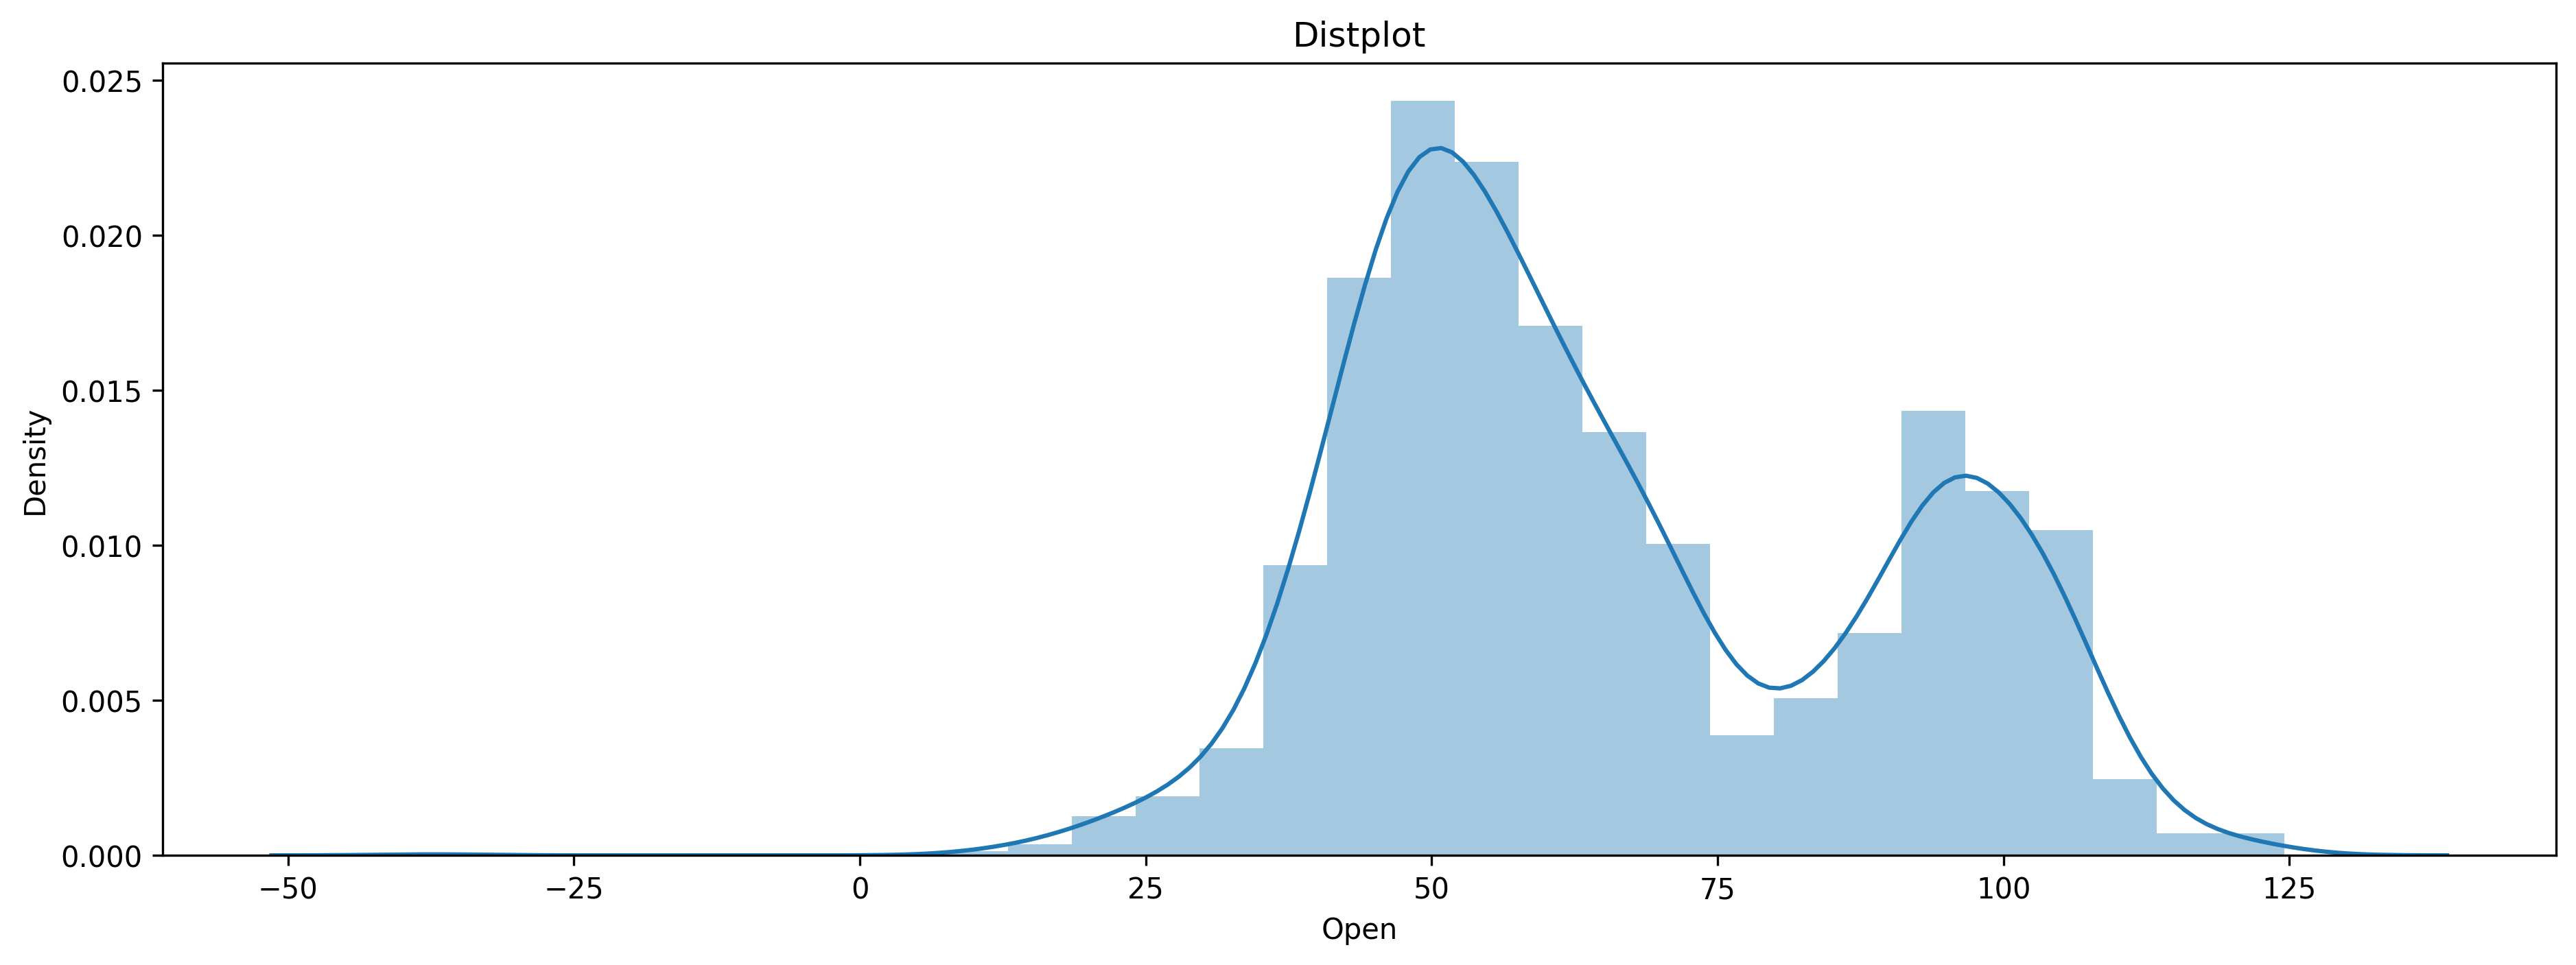

High


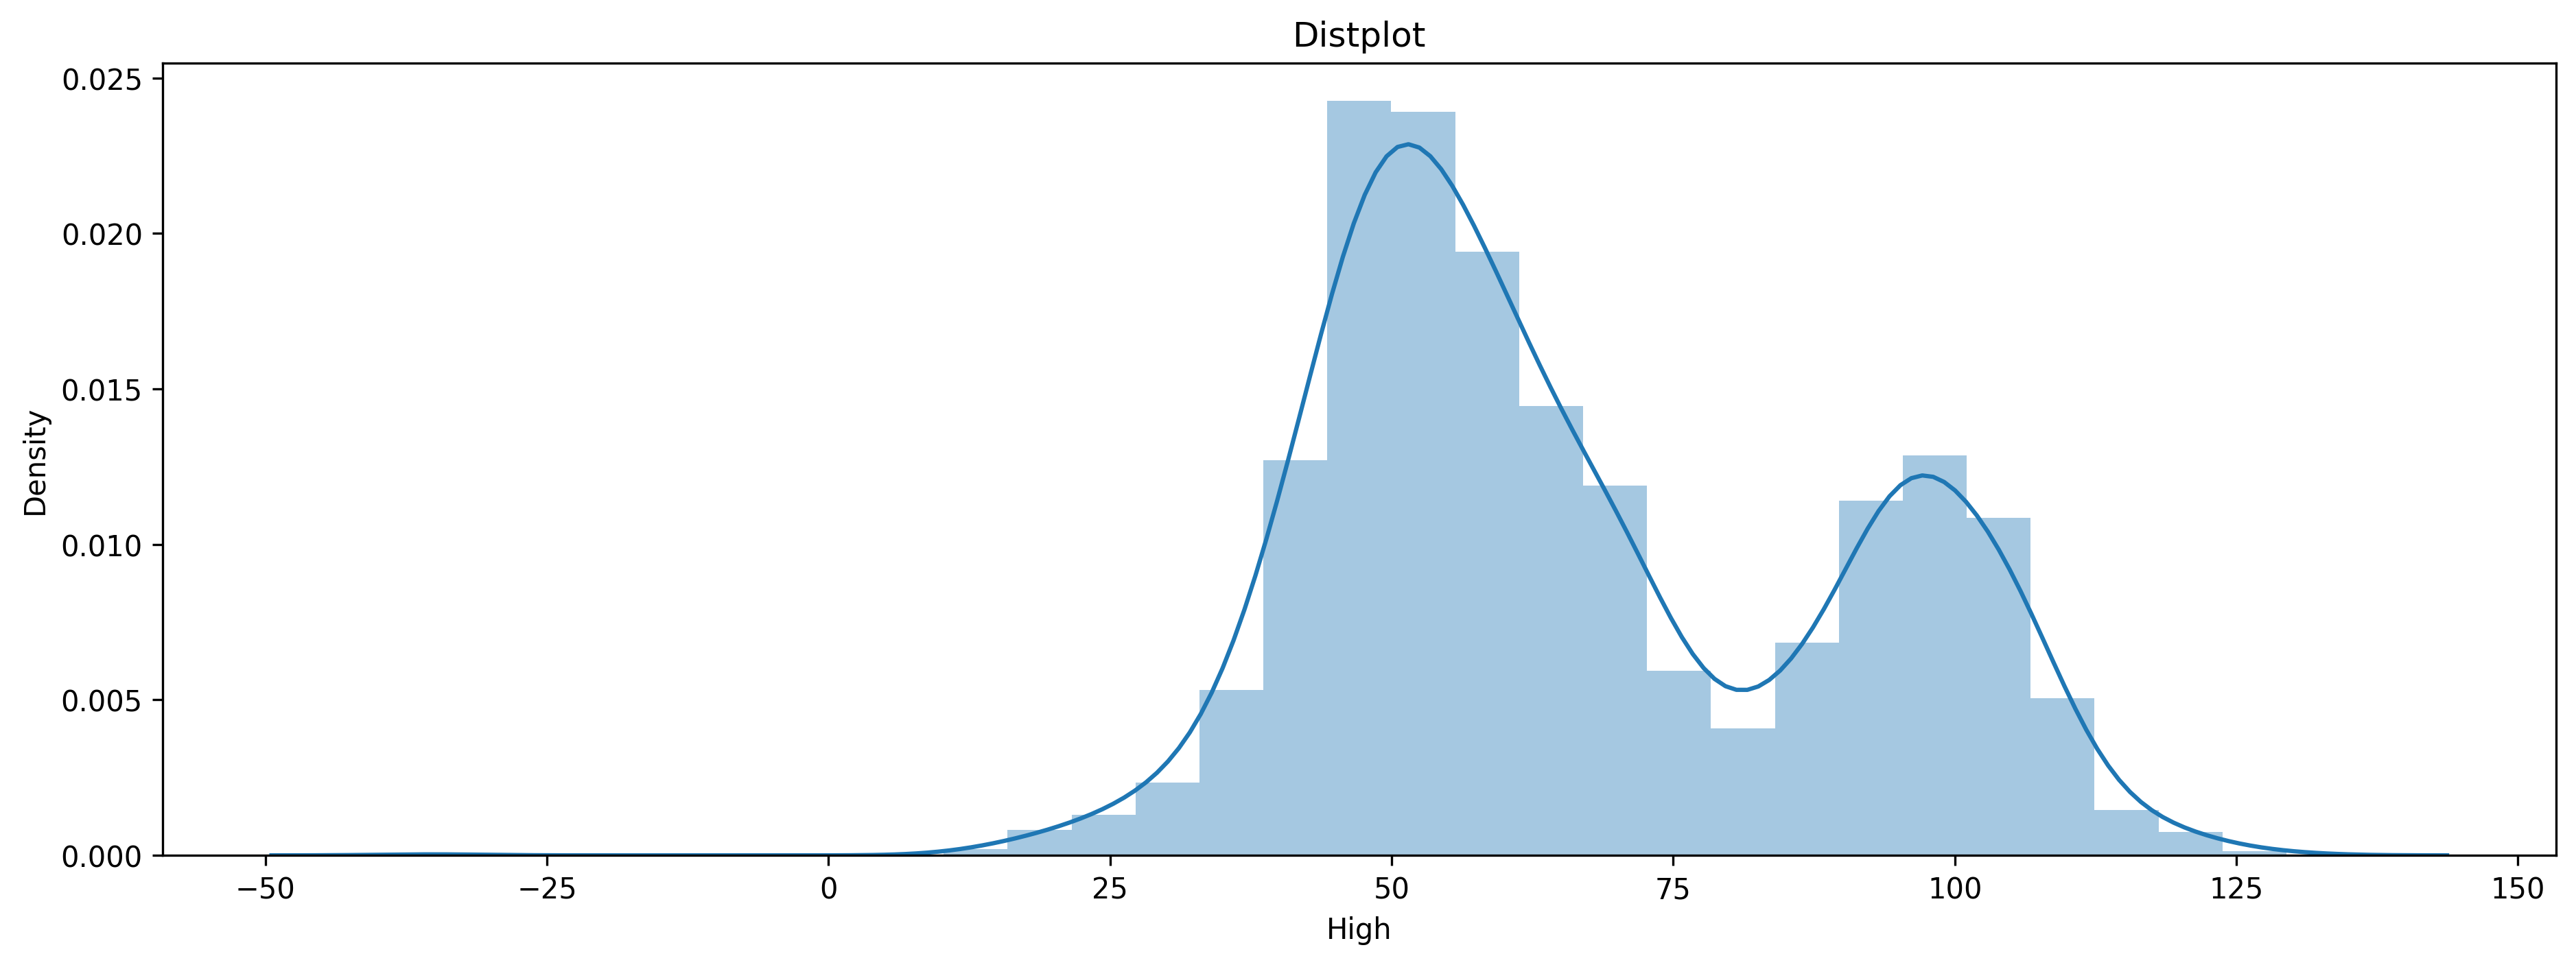

Low


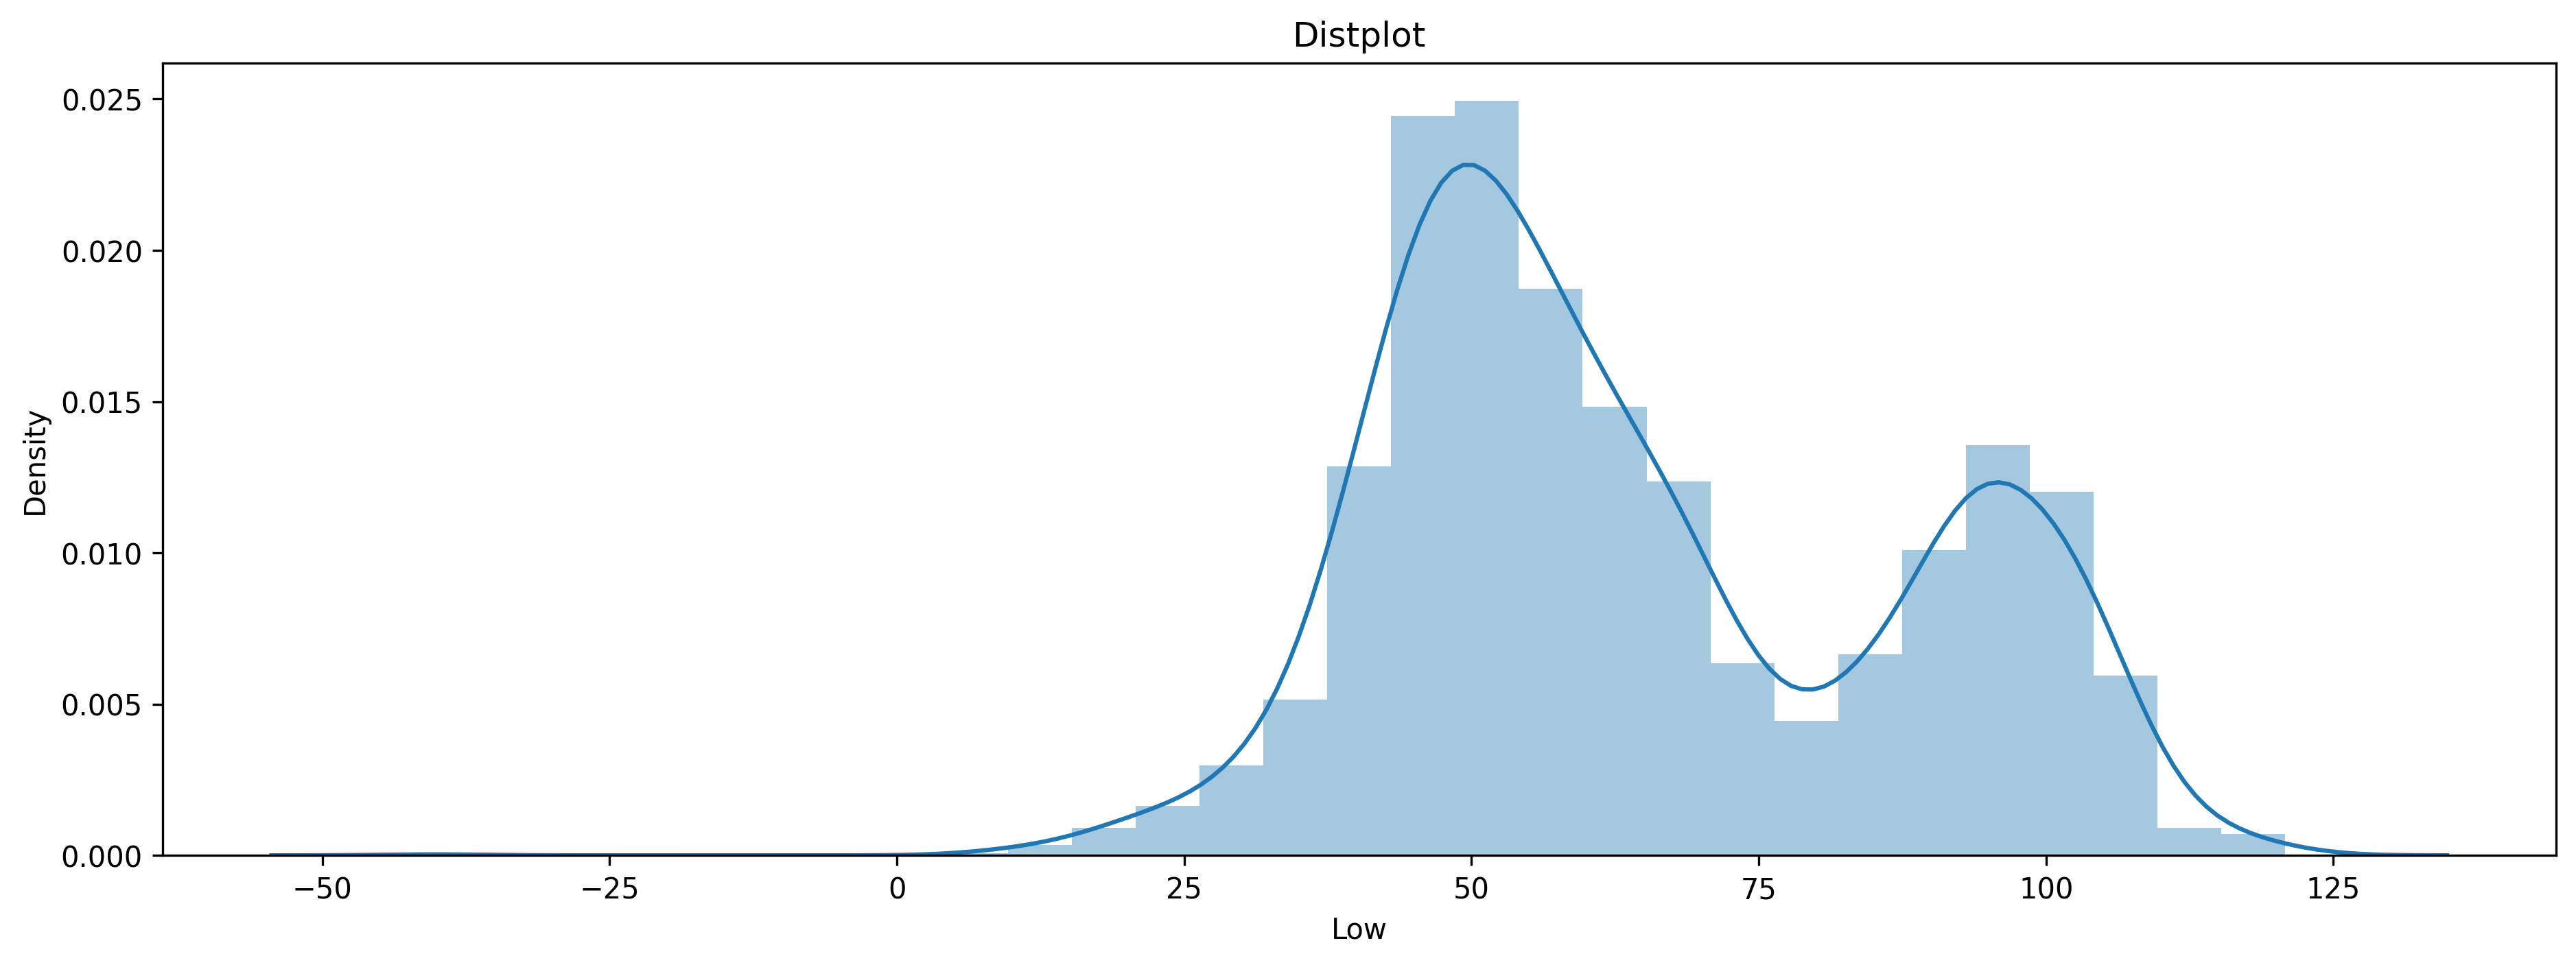

In [23]:
sel_fea = [features for features in oil.columns if oil[features].dtypes =='float']

for i in sel_fea:
    print(i)
    plt.figure(figsize=(15,5))
    plt.title('Distplot')
    sns.distplot(oil[i])
    plt.show()

### Bar Plot for Average, Maximum and Minimum Oil Price

<Figure size 3600x1800 with 0 Axes>

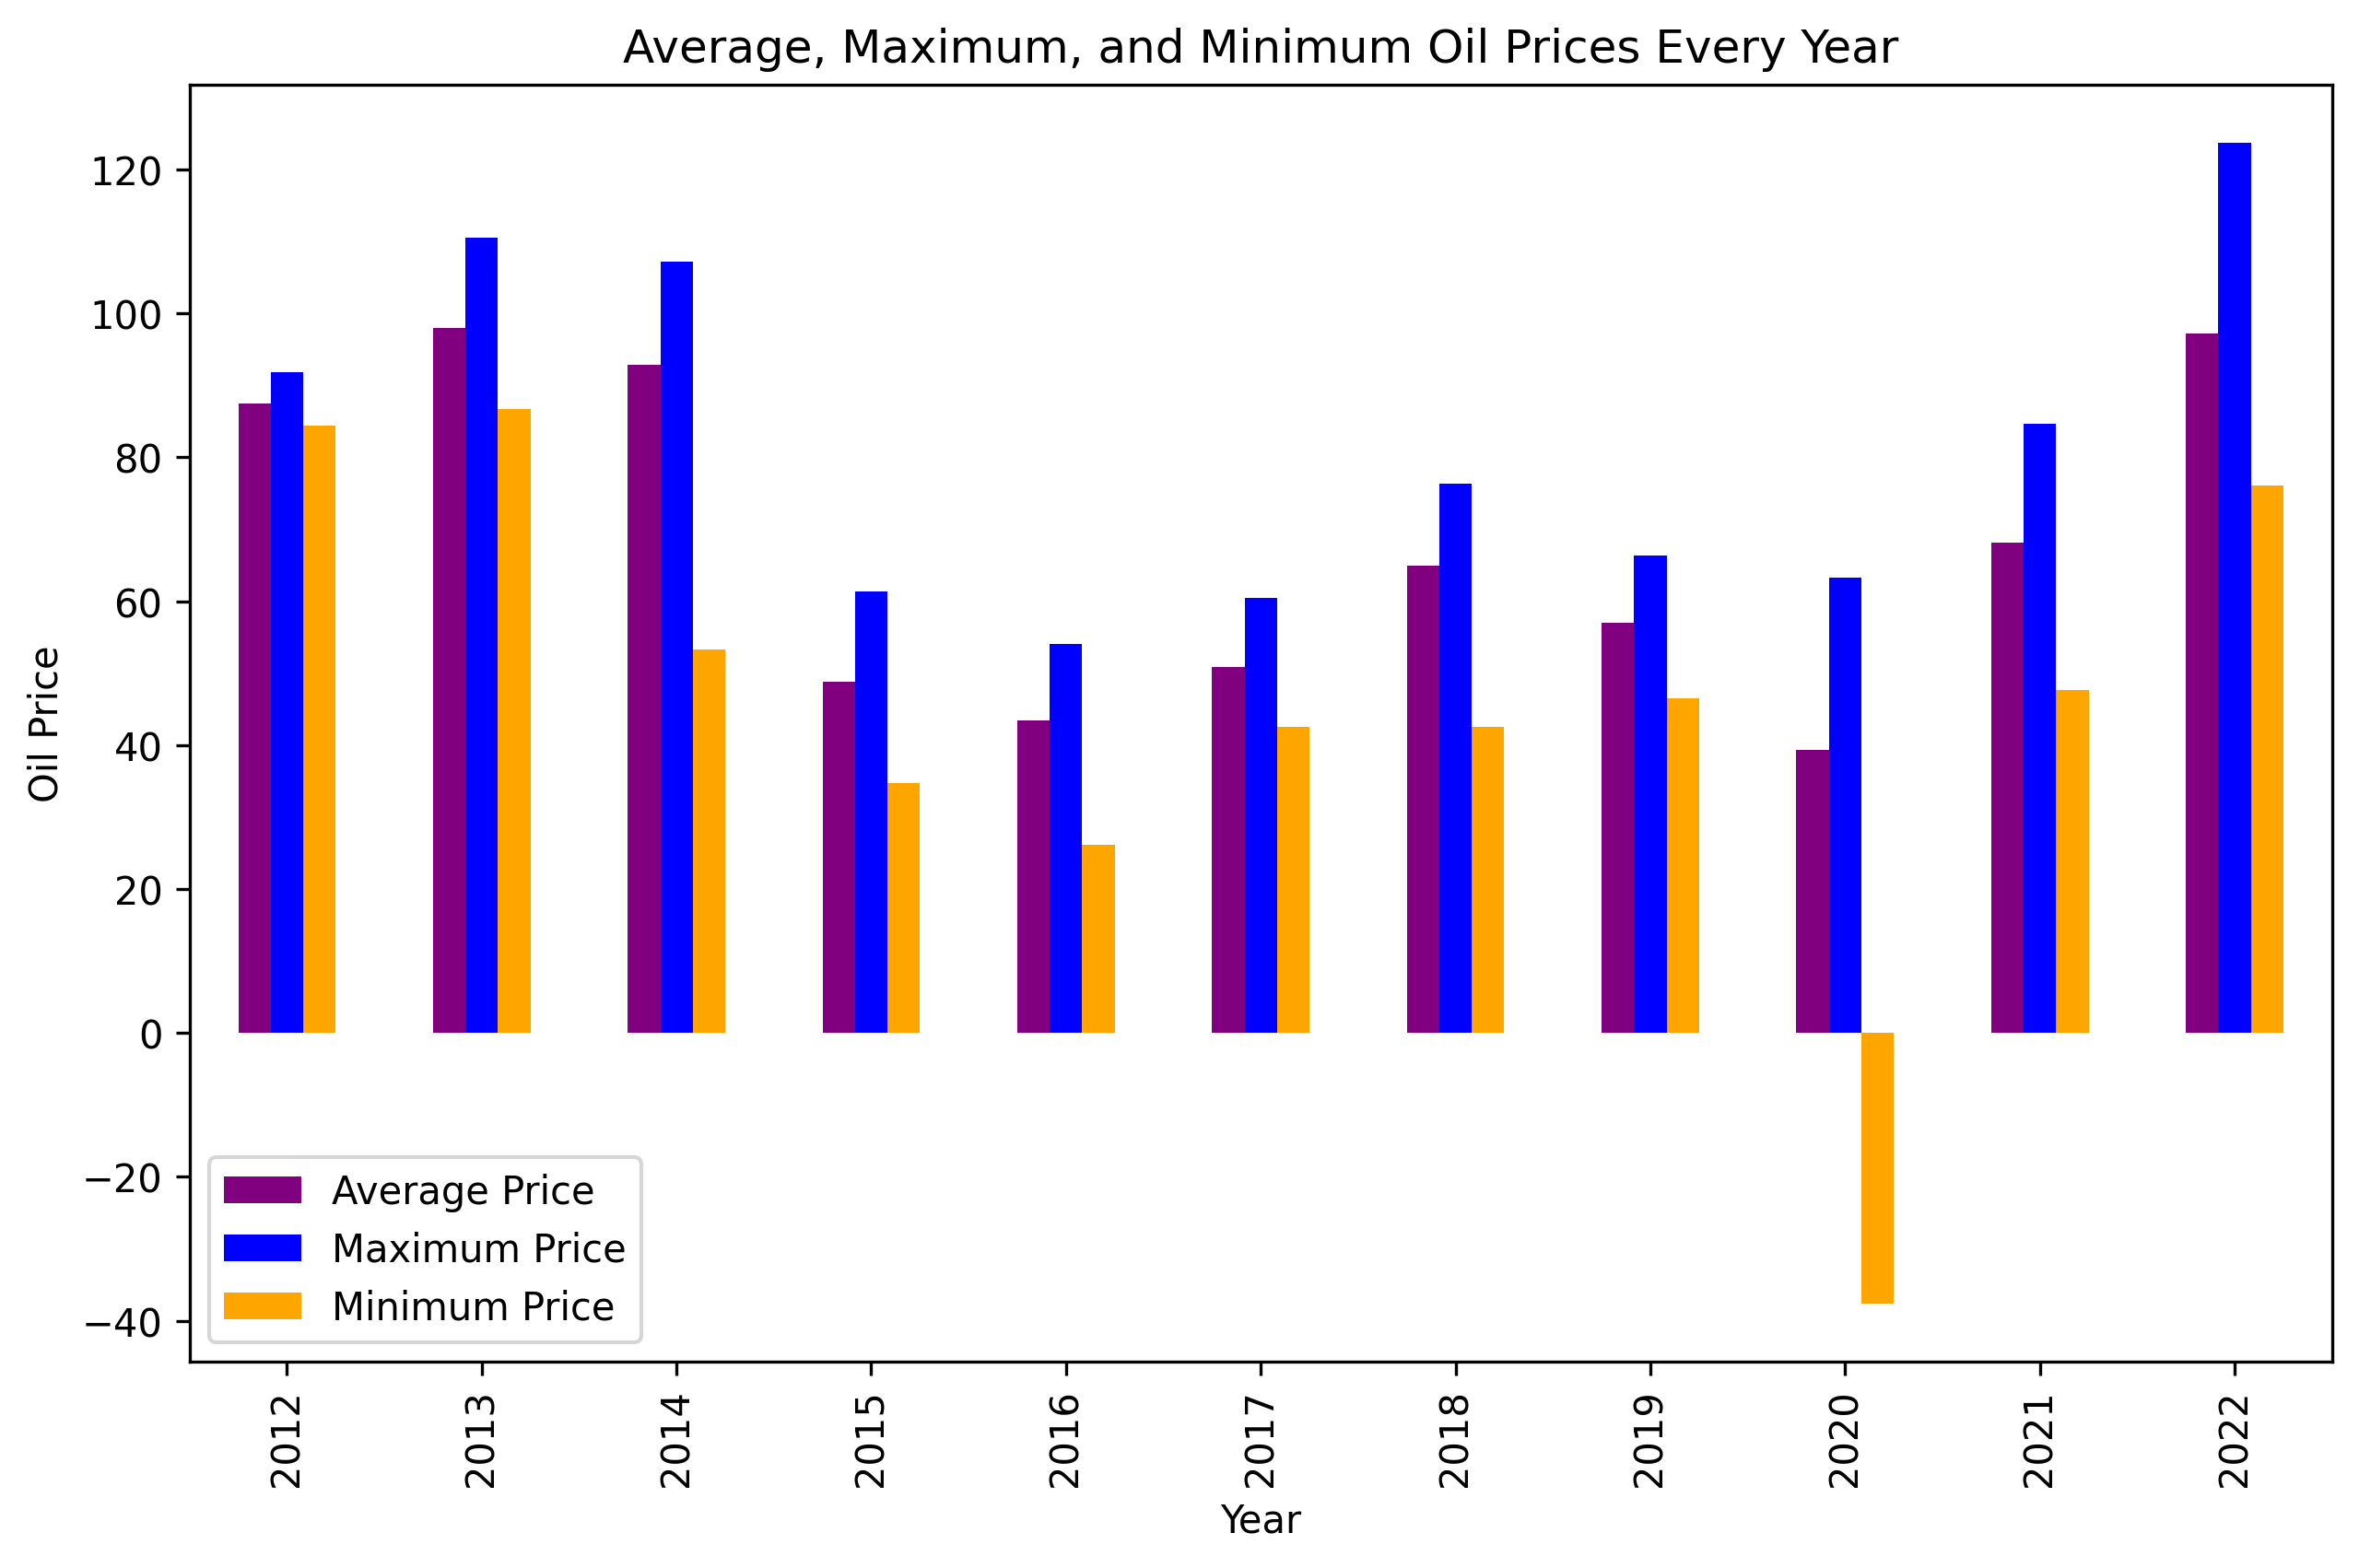

In [24]:
# Calculate the Average, Maximum, and Minimum Oil prices for each year

yearly_stats = oil.groupby('Year')['Close'].agg(['mean', 'max', 'min'])

# Plotting the Bar Plot for Average, Maximum, and Minimum Oil prices every year

plt.figure(figsize=(12, 6))
yearly_stats.plot(kind='bar', color=['purple', 'blue', 'orange'])
plt.xlabel('Year')
plt.ylabel('Oil Price')
plt.title('Average, Maximum, and Minimum Oil Prices Every Year')
plt.legend(['Average Price', 'Maximum Price', 'Minimum Price'])

### Volume of Oil over time

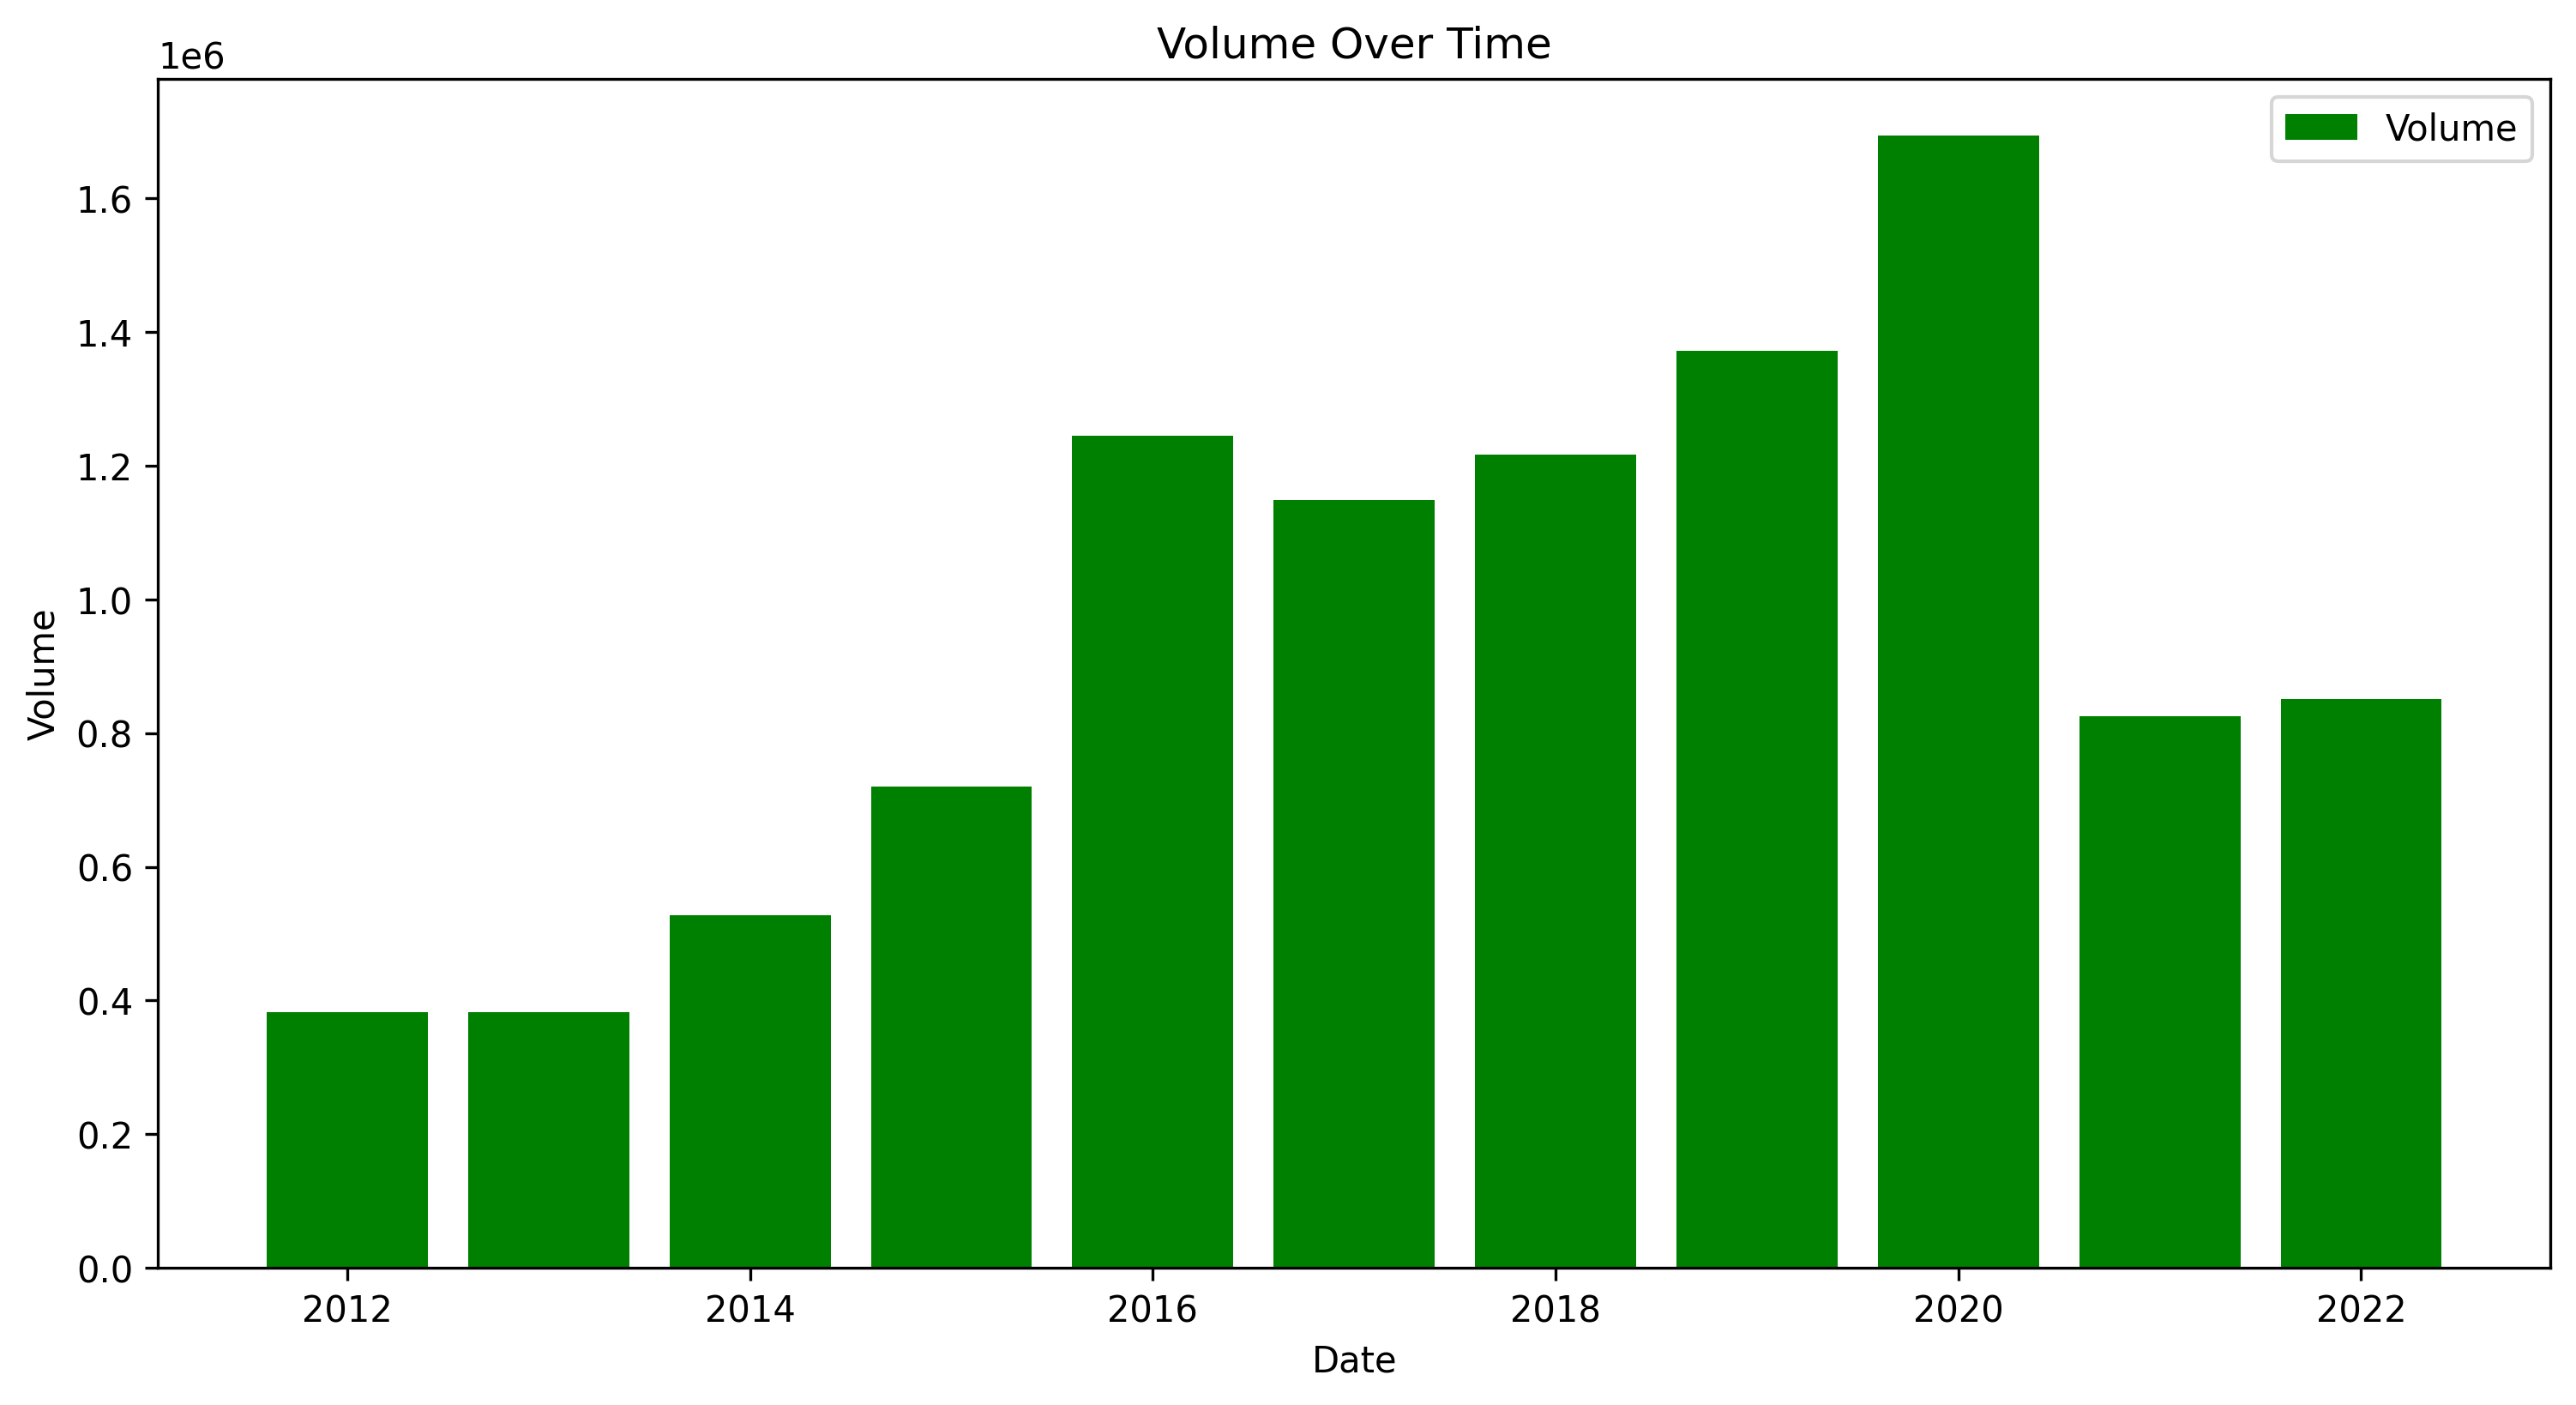

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(oil['Year'], oil['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.legend()

### Heatmap of Correlation Matrix
- To quickly identify patterns, trends, and relationships among variables.

Text(0.5, 1.0, 'Correlation Matrix')

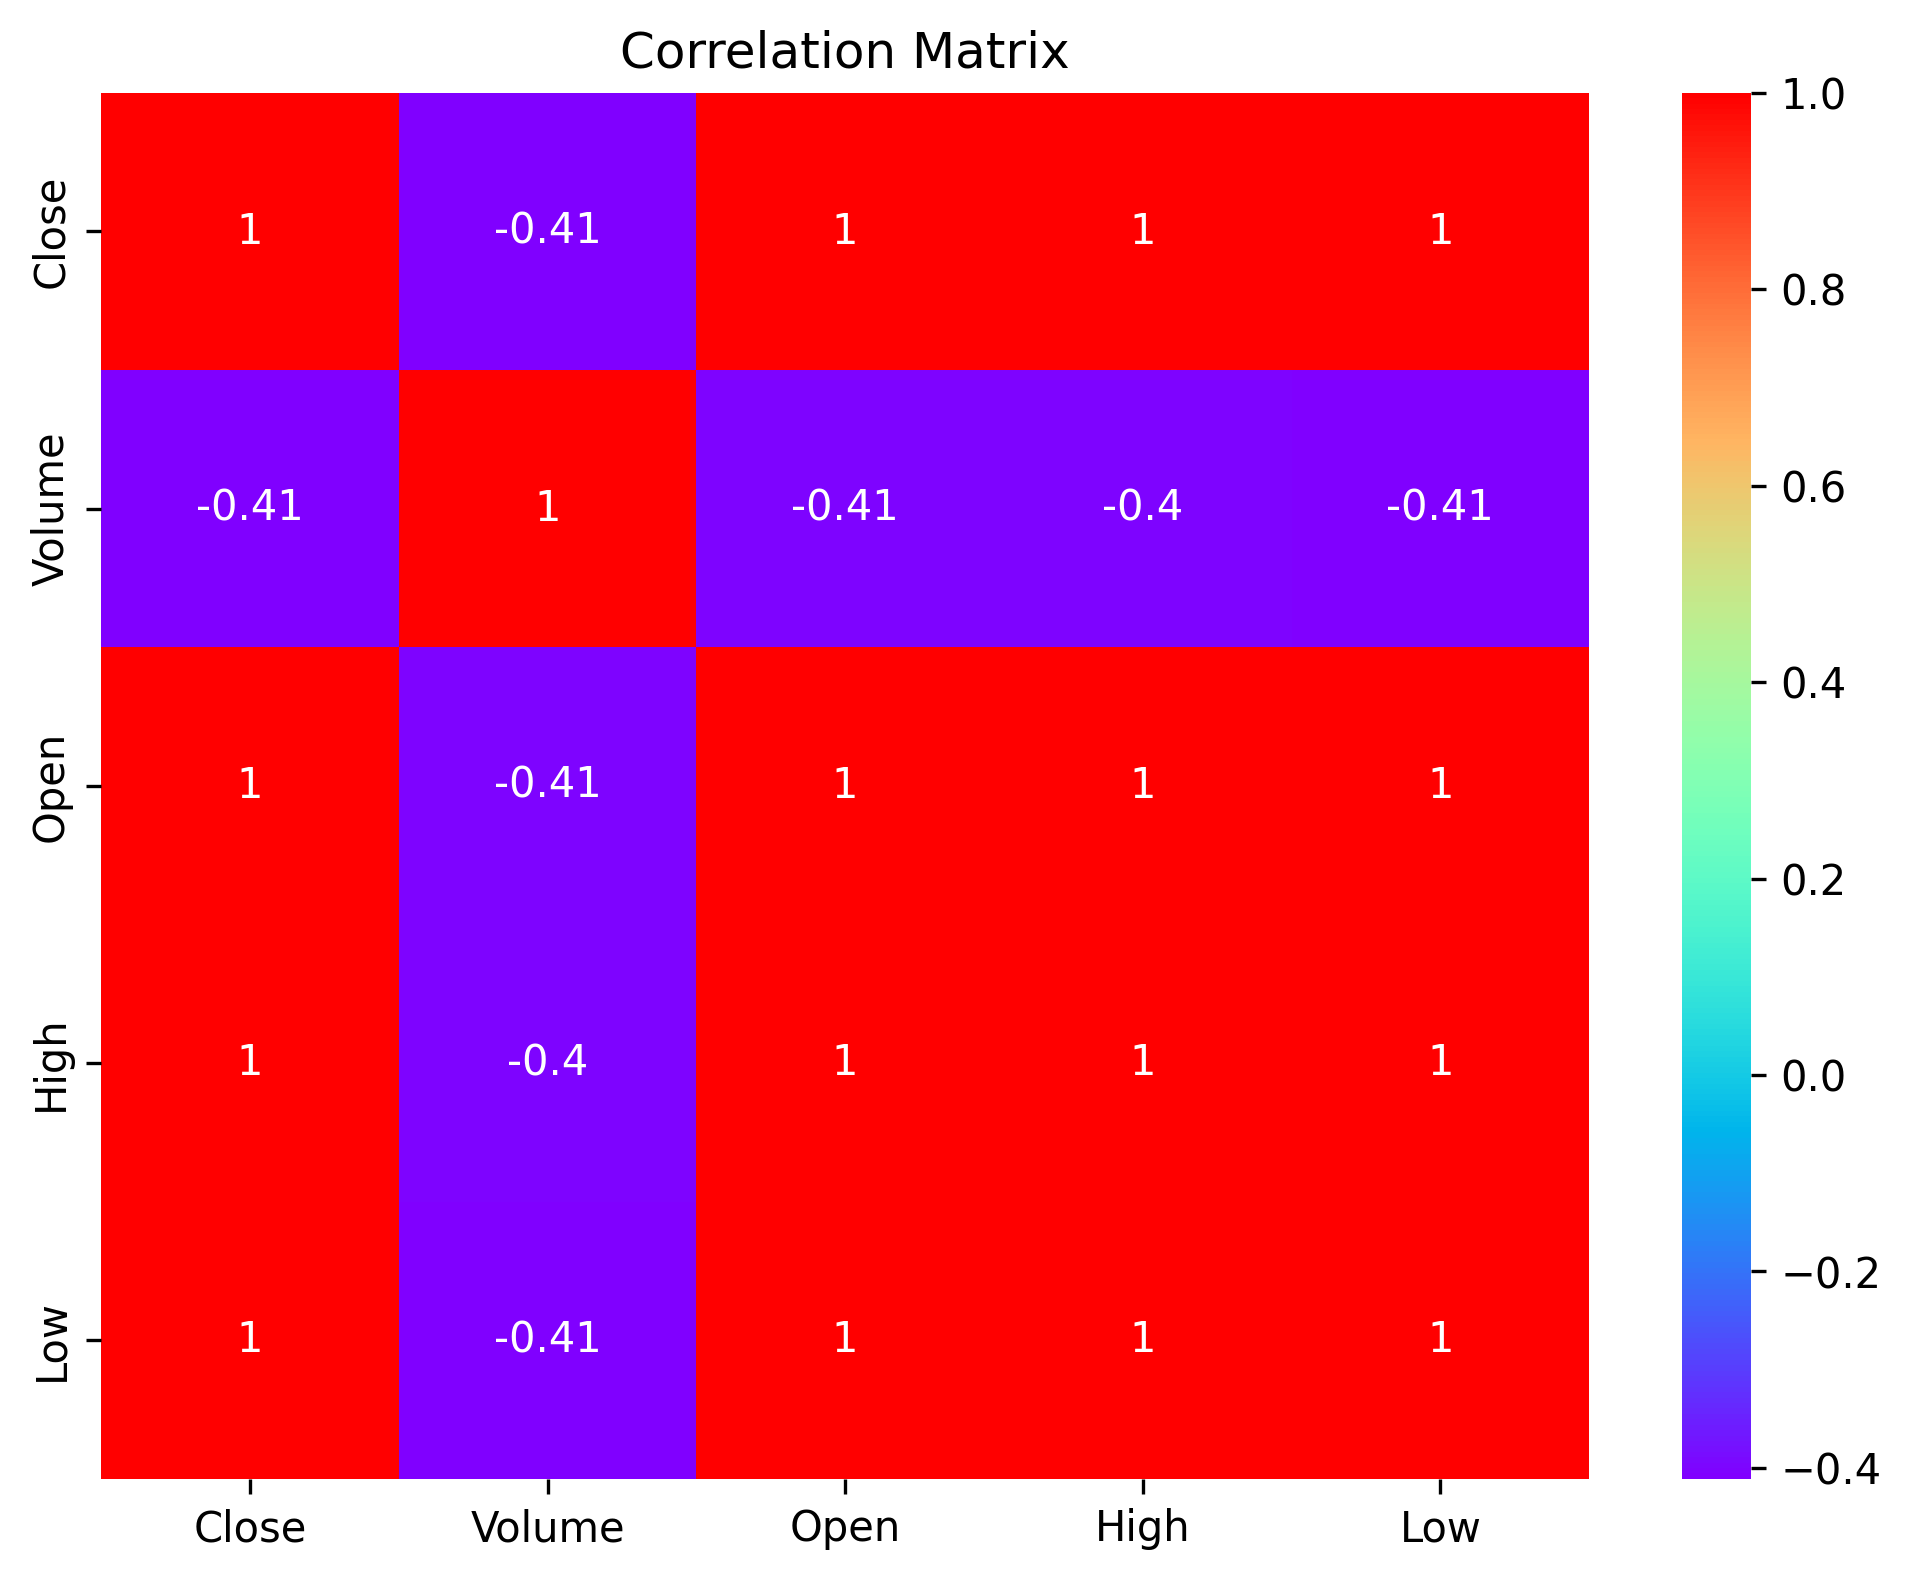

In [26]:
sbs_hm = df.iloc[:, :6]
plt.figure(figsize=(8, 6))
sns.heatmap(sbs_hm.corr(), annot=True, cmap='rainbow')
plt.title('Correlation Matrix')

# Model Building

### ARIMA (Auto-Regressive Integrated Moving Average) Model
- ARIMA is composed of 3 terms (Auto-Regression(p) + Integrated(d) + Moving-Average(q))
- Before moving with ARIMA we need to calculate the Order of Arima. i.e Values of 'p', 'd', 'q'

In [27]:
#Find out the order of Arima

from pmdarima import auto_arima

order = auto_arima(oil1['First-Order'])
order

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
oil1

,Close,Volume,Open,High,Low,Year,First-Order
Date,,,,,,,
2012-10-31,86.24,192354.0,85.73,87.19,85.61,2012,0.56
2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012,0.85
2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012,-2.23
2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012,0.79
2012-11-06,88.71,270163.0,85.67,89.22,85.42,2012,3.06
...,...,...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022,-0.56
2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022,0.74
2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022,2.59


In [29]:
# Split the Data into Training & Testing

Train = oil1[['Volume','Open','High','Low','Year','First-Order']].iloc[:1911, :]
Train

,Volume,Open,High,Low,Year,First-Order
Date,,,,,,
2012-10-31,192354.0,85.73,87.19,85.61,2012,0.56
2012-11-01,185097.0,86.10,87.42,85.92,2012,0.85
2012-11-02,273619.0,86.91,87.24,84.66,2012,-2.23
2012-11-05,185846.0,84.65,85.90,84.34,2012,0.79
2012-11-06,270163.0,85.67,89.22,85.42,2012,3.06
...,...,...,...,...,...,...
2020-04-16,319273.0,20.15,20.53,19.42,2020,-0.12
2020-04-17,213600.0,20.00,20.22,17.31,2020,-1.48
2020-04-20,148427.0,-37.25,-35.20,-40.32,2020,-55.90


In [30]:
Test = oil1[['Volume','Open','High','Low','Year','First-Order']].iloc[1911:, :]
Test

,Volume,Open,High,Low,Year,First-Order
Date,,,,,,
2020-04-23,777155.0,14.20,18.26,13.35,2020,2.72
2020-04-24,565121.0,16.78,17.97,15.64,2020,0.44
2020-04-27,581712.0,16.84,16.98,11.88,2020,-4.16
2020-04-28,815946.0,12.96,13.69,10.07,2020,-0.44
2020-04-29,510049.0,13.35,16.78,12.67,2020,2.72
...,...,...,...,...,...,...
2022-10-24,238458.0,85.24,85.92,82.63,2022,-0.56
2022-10-25,226337.0,84.88,86.03,83.06,2022,0.74
2022-10-26,271474.0,85.07,88.41,84.14,2022,2.59


In [72]:
from statsmodels.tsa.arima.model import ARIMA

Arima = ARIMA(Train['First-Order'], order = (1,0,1)).fit()
Arima_pred = Arima.predict(start=1911, end = 2546)
Arima_pred

C:\Users\Suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Suraj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1911   -5.341866
1912   -0.317577
1913   -0.055159
1914   -0.041453
1915   -0.040737
          ...   
2542   -0.040698
2543   -0.040698
2544   -0.040698
2545   -0.040698
2546   -0.040698
Name: predicted_mean, Length: 636, dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared error :",np.sqrt(mean_squared_error(Test['First-Order'], Arima_pred)))
print(f"R2 Score :",r2_score(Test['First-Order'], Arima_pred))

Mean Squared error : 2.1770744638125232
R2 Score : -0.024929542961336315


### Multiple Linear Regression 

In [57]:
oil

,Close,Volume,Open,High,Low,Year
Date,,,,,,
2012-10-30,85.68,363816.0,85.68,85.68,85.68,2012
2012-10-31,86.24,192354.0,85.73,87.19,85.61,2012
2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012
2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012
2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012
...,...,...,...,...,...,...
2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022
2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022
2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022


In [47]:
# Define x & y

x = oil.drop(columns=['Close', 'Year'])
y = oil['Close']

# Spilt the data into 'Training' & 'Testing'

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(xtrain, ytrain)
mlr_pred = mlr.predict(xtest)

In [50]:
print(f"Training Accuracy :",mlr.score(xtrain,ytrain))
print(f"Testing Accuracy :",mlr.score(xtest,ytest))
print(f"Model Accuracy :",r2_score(ytest,mlr_pred))

Training Accuracy : 0.9992675748170025
Testing Accuracy : 0.9993851833863276
Model Accuracy : 0.9993851833863276


### Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
dtr_pred = dtr.predict(xtest)

In [64]:
print(f"Training Accuracy :",dtr.score(xtrain,ytrain))
print(f"Testing Accuracy :",dtr.score(xtest,ytest))
print(f"Model Accuracy :",r2_score(ytest,dtr_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.9985679174392921
Model Accuracy : 0.9985679174392921


### Gradient Boosting

In [66]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(xtrain, ytrain)
xgbr_pred = xgbr.predict(xtest)

In [67]:
print(f"Training Accuracy :",xgbr.score(xtrain,ytrain))
print(f"Testing Accuracy :",xgbr.score(xtest,ytest))
print(f"Model Accuracy :",r2_score(ytest,xgbr_pred))

Training Accuracy : 0.9999003898299857
Testing Accuracy : 0.9986125978663369
Model Accuracy : 0.9986125978663369


In [68]:
len(Train)

1911

In [69]:
len(Test)

636